<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/8702_TEST_1051-1100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2850]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [2851]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

RDKit ERROR: [11:14:58] non-ring atom 1 marked aromatic


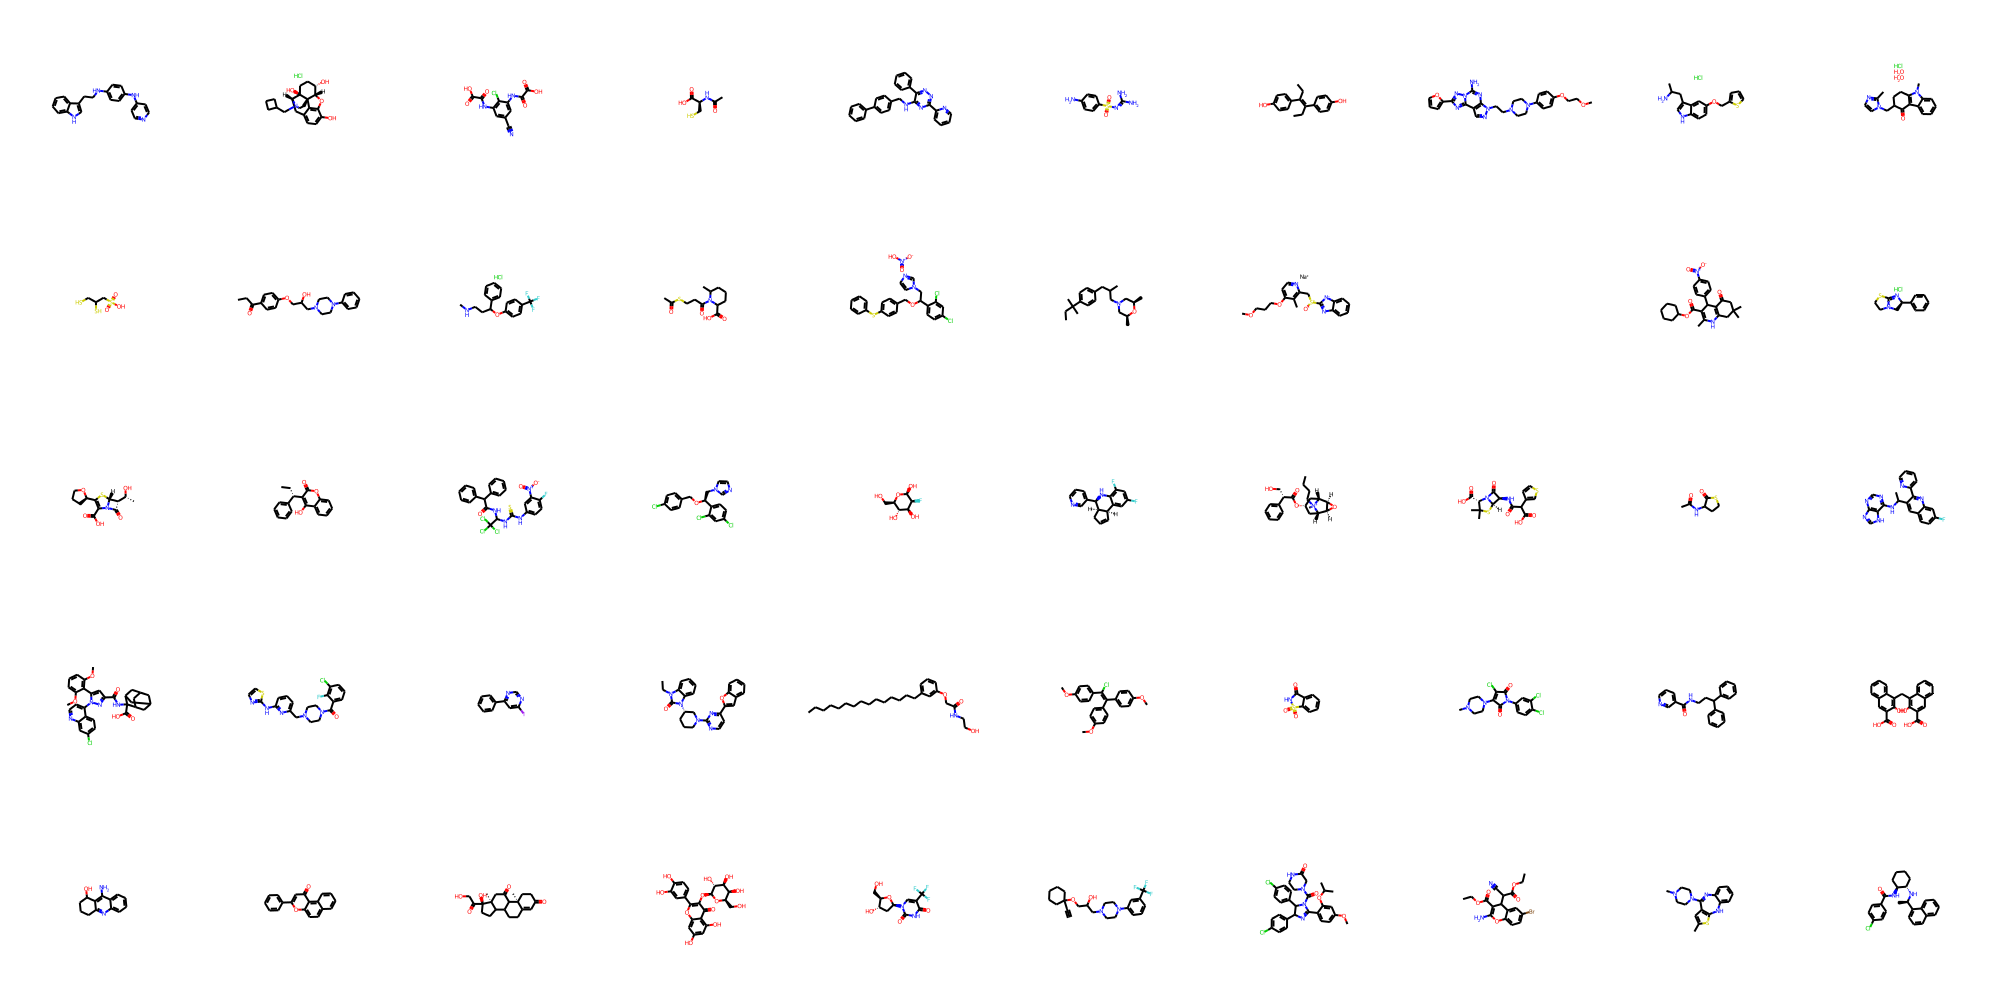

In [2852]:
smiles_list = [

'c1ccc2c(CCNc3ccc(Nc4ccncc4)cc3)c[nH]c2c1',
'Cl.Oc1ccc2c3c1O[C@H]1[C@@H](O)CC[C@@]4(O)[C@@H](C2)N(CC2CCC2)CC[C@]314',
'N#Cc1cc(NC(=O)C(=O)O)c(Cl)c(NC(=O)C(=O)O)c1',
'CC(=O)N[C@@H](CS)C(=O)O',
'c1ccc(-c2ccc(CNc3nc(-c4ccccn4)nnc3-c3ccccc3)cc2)cc1',
'NC(N)=NS(=O)(=O)c1ccc(N)cc1',
'CC/C(=C(/CC)c1ccc(O)cc1)c1ccc(O)cc1',
'COCCOc1ccc(N2CCN(CCn3ncc4c3nc(N)n3nc(-c5ccco5)nc43)CC2)cc1',
'CC(N)Cc1c[nH]c2ccc(OCc3cccs3)cc12.Cl',
'Cc1nccn1CC1CCc2c(c3ccccc3n2C)C1=O.Cl.O.O',
'O=S(=O)(O)CC(S)CS',
'CCC(=O)c1ccc(OCC(O)CN2CCN(c3ccccc3)CC2)cc1',
'CNCCC(Oc1ccc(C(F)(F)F)cc1)c1ccccc1.Cl',
'CC(=O)SCCC(=O)N1C(C)CCCC1C(=O)O',
'Clc1ccc(C(Cn2ccnc2)OCc2ccc(Sc3ccccc3)cc2)c(Cl)c1.O=[N+]([O-])O',
'CCC(C)(C)c1ccc(CC(C)CN2C[C@H](C)O[C@H](C)C2)cc1',
'COCCCOc1ccnc(C[S+]([O-])c2nc3ccccc3[n-]2)c1C.[Na+]',
'No Data',
'CC1=C(C(=O)OC2CCCCC2)C(c2ccc([N+](=O)[O-])cc2)C2=C(CC(C)(C)CC2=O)N1',
'Cl.c1ccc([C@H]2CN3CCSC3=N2)cc1',
'C[C@@H](O)[C@@H]1C(=O)N2C(C(=O)O)=C([C@H]3CCCO3)S[C@H]12',
'CC[C@@H](c1ccccc1)c1c(O)c2ccccc2oc1=O',
'O=C(NC(NC(=S)Nc1ccc(F)c([N+](=O)[O-])c1)C(Cl)(Cl)Cl)C(c1ccccc1)c1ccccc1',
'Clc1ccc(CO[C@@H](Cn2ccnc2)c2ccc(Cl)cc2Cl)cc1',
'OC[C@H]1O[C@@H](O)[C@@H](F)[C@@H](O)[C@@H]1O',
'Fc1cc(F)c2c(c1)[C@H]1C=CC[C@H]1[C@@H](c1cccnc1)N2',
'CCCC[N+]1(C)[C@H]2C[C@H](OC(=O)[C@@H](CO)c3ccccc3)C[C@@H]1[C@H]1O[C@@H]21',
'CC1(C)S[C@@H]2[C@H](NC(=O)C(C(=O)O)c3ccsc3)C(=O)N2[C@H]1C(=O)O',
'CC(=O)NC1CCSC1=O',
'CC(Nc1ncnc2nc[nH]c12)c1cc2ccc(F)cc2nc1-c1ccccn1',
'COc1cccc(OC)c1-c1cc(C(=O)NC2(C(=O)O)C3CC4CC(C3)CC2C4)nn1-c1ccnc2cc(Cl)ccc12',
'O=C(c1cccc(Cl)c1F)N1CCN(Cc2cccc(Nc3nccs3)n2)CC1',
'Ic1cc(-c2ccccc2)ncn1',
'CCn1c(=O)n([C@H]2CCCN(c3nccc(-c4cc5ccccc5o4)n3)C2)c2ccccc21',
'CCCCCCCCCCCCCCCc1cccc(OCC(=O)NCCO)c1',
'COc1ccc(C(Cl)=C(c2ccc(OC)cc2)c2ccc(OC)cc2)cc1',
'O=C1NS(=O)(=O)c2ccccc21',
'CN1CCN(C2=C(Cl)C(=O)N(c3ccc(Cl)c(Cl)c3)C2=O)CC1',
'O=C(NCCC(c1ccccc1)c1ccccc1)c1cccnc1',
'O=C(O)c1cc2ccccc2c(Cc2c(O)c(C(=O)O)cc3ccccc23)c1O',
'Nc1c2c(nc3ccccc13)CCCC2O',
'O=c1cc(-c2ccccc2)oc2ccc3ccccc3c12',
'C[C@]12CC(=O)C3C(CCC4=CC(=O)CC[C@@]43C)C1CC[C@]2(O)C(=O)CO',
'O=c1c(O[C@@H]2O[C@H](CO)[C@H](O)[C@H](O)[C@H]2O)c(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12',
'O=c1[nH]c(=O)n([C@H]2C[C@H](O)[C@@H](CO)O2)cc1C(F)(F)F',
'C#CC1(OCC(O)CN2CCN(c3cccc(C(F)(F)F)c3)CC2)CCCCC1',
'COc1ccc(C2=NC(c3ccc(Cl)cc3)C(c3ccc(Cl)cc3)N2C(=O)N2CCNC(=O)C2)c(OC(C)C)c1',
'CCOC(=O)C1=C(N)Oc2ccc(Br)cc2C1C(C#N)C(=O)OCC',
'Cc1cc2c(s1)Nc1ccccc1N=C2N1CCN(C)CC1',
'C[C@@H](N[C@H]1CCCC[C@@H]1NC(=O)c1ccc(Cl)cc1)c1cccc2ccccc12',

               
]
mol_list = []
for smiles in smiles_list:
   mol= Chem.MolFromSmiles (smiles)
   mol_list.append (mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=10)
img



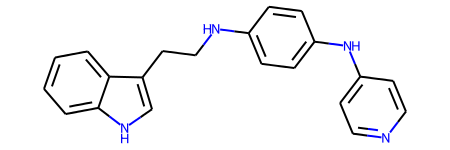

In [2853]:
M1 = mol_list [0]
M1

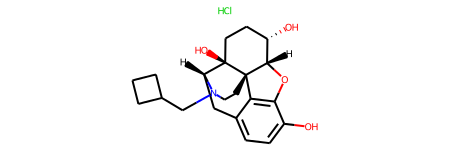

In [2854]:
M2 = mol_list [1]
M2

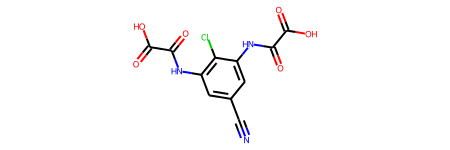

In [2855]:
M3 = mol_list [2]
M3

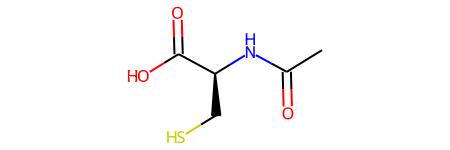

In [2856]:
M4 = mol_list [3]
M4

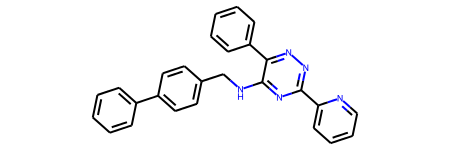

In [2857]:
M5 = mol_list [4]
M5

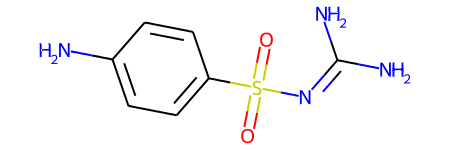

In [2858]:
M6 = mol_list [5]
M6

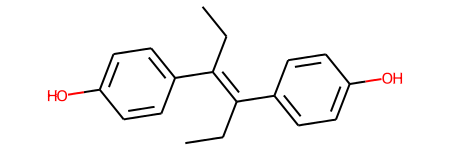

In [2859]:
M7 = mol_list [6]
M7

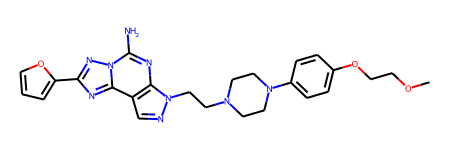

In [2860]:
M8 = mol_list [7]
M8

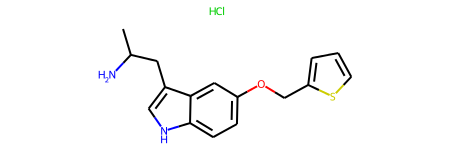

In [2861]:
M9 = mol_list [8]
M9

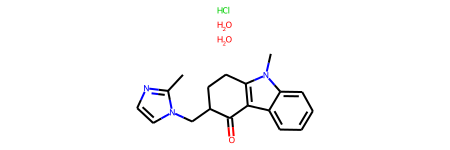

In [2862]:
M10 = mol_list [9]
M10

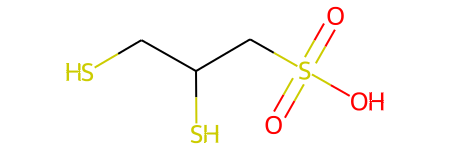

In [2863]:
M11 = mol_list [10]
M11

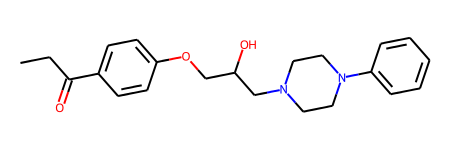

In [2864]:
M12 = mol_list [11]
M12

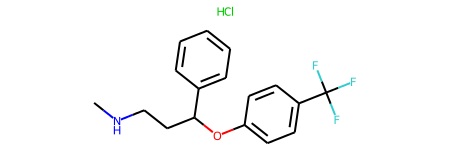

In [2865]:
M13 = mol_list [12]
M13

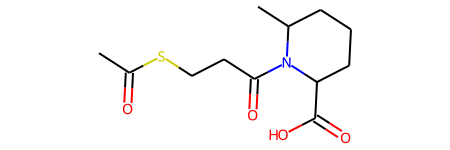

In [2866]:
M14 = mol_list [13]
M14

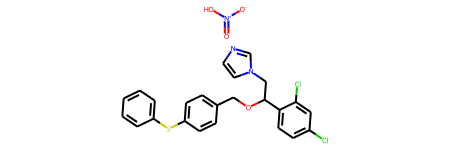

In [2867]:
M15 = mol_list [14]
M15

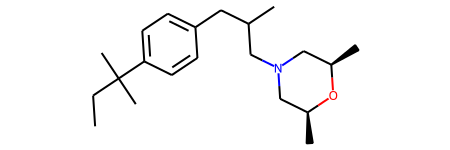

In [2868]:
M16 = mol_list [15]
M16

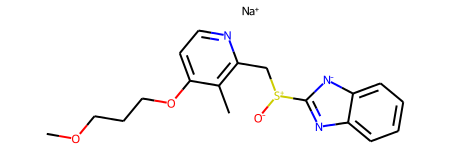

In [2869]:
M17 = mol_list [16]
M17

In [2870]:
M18 = mol_list [17]
M18

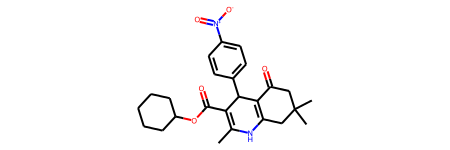

In [2871]:
M19 = mol_list [18]
M19

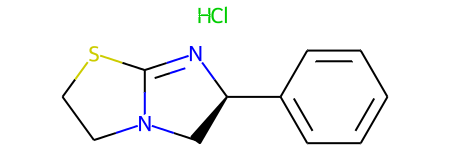

In [2872]:
M20 = mol_list [19]
M20

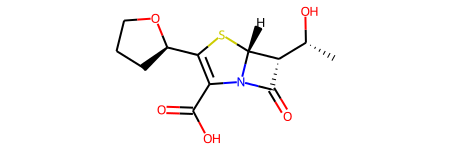

In [2873]:
M21 = mol_list [20]
M21

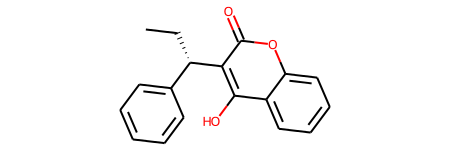

In [2874]:
M22 = mol_list [21]
M22

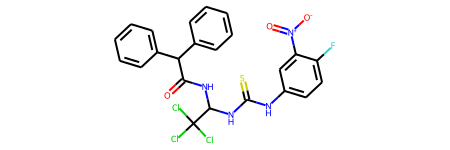

In [2875]:
M23 = mol_list [22]
M23

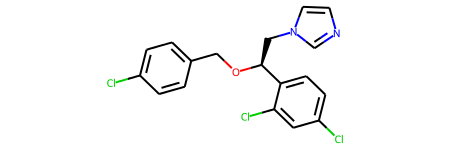

In [2876]:
M24 = mol_list [23]
M24

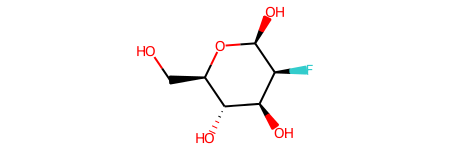

In [2877]:
M25 = mol_list [24]
M25

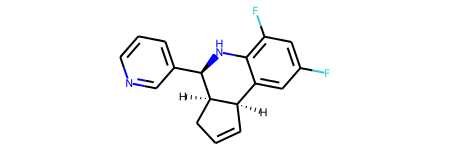

In [2878]:
M26 = mol_list [25]
M26

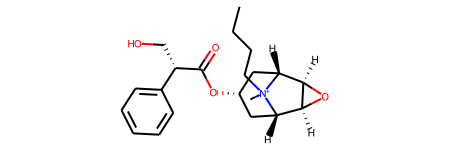

In [2879]:
M27 = mol_list [26]
M27

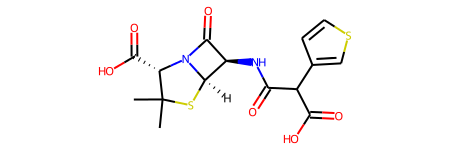

In [2880]:
M28 = mol_list [27]
M28

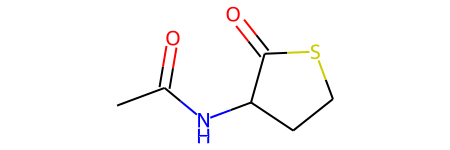

In [2881]:
M29 = mol_list [28]
M29

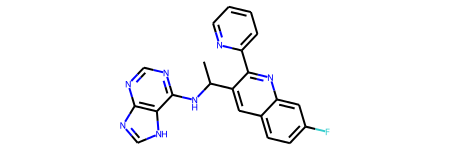

In [2882]:
M30 = mol_list [29]
M30

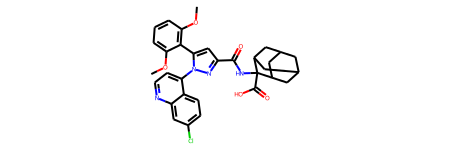

In [2883]:
M31 = mol_list [30]
M31

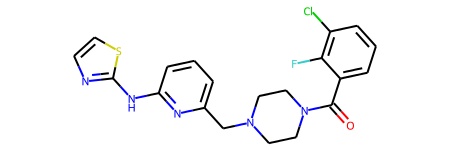

In [2884]:
M32 = mol_list [31]
M32

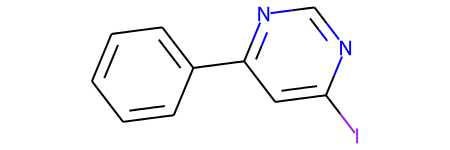

In [2885]:
M33 = mol_list [32]
M33

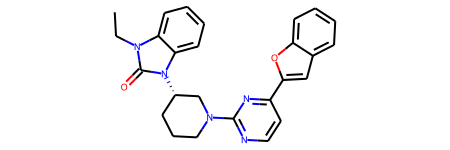

In [2886]:
M34 = mol_list [33]
M34

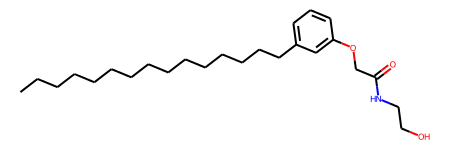

In [2887]:
M35 = mol_list [34]
M35

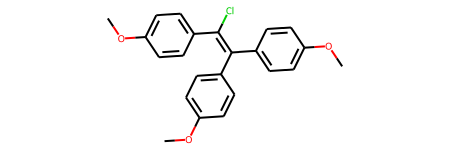

In [2888]:
M36 = mol_list [35]
M36

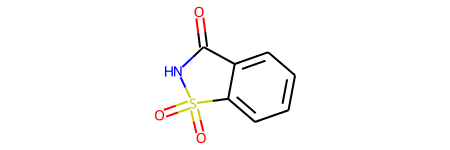

In [2889]:
M37= mol_list [36]
M37

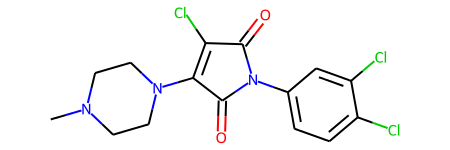

In [2890]:
M38= mol_list [37]
M38

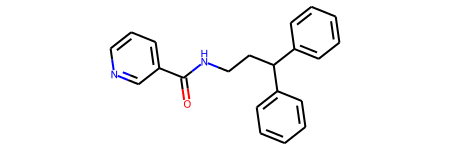

In [2891]:
M39= mol_list [38]
M39

/usr/local/lib/python3.7/dist-packages/IPython/core/displayhook.py:260: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


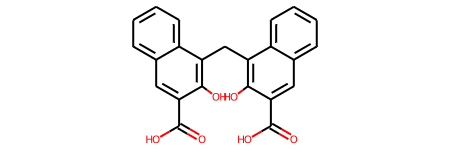

In [2892]:
M40= mol_list [39]
M40

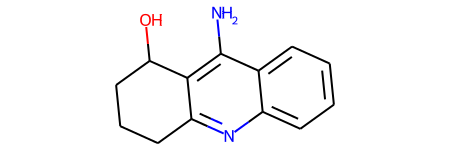

In [2893]:
M41= mol_list [40]
M41

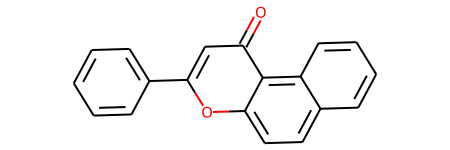

In [2894]:
M42= mol_list [41]
M42

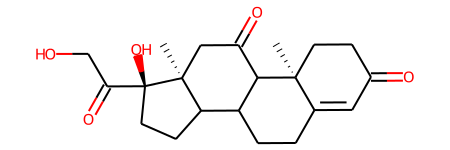

In [2895]:
M43= mol_list [42]
M43

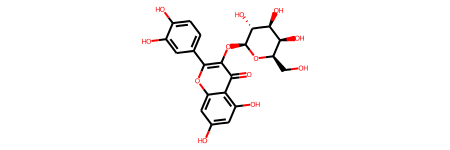

In [2896]:
M44= mol_list [43]
M44

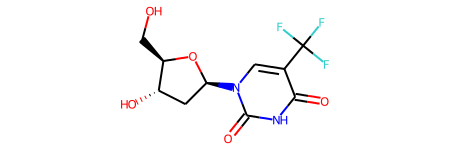

In [2897]:
M45= mol_list [44]
M45

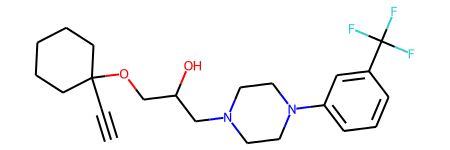

In [2898]:
M46= mol_list [45]
M46

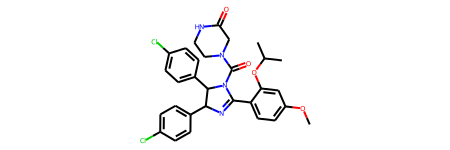

In [2899]:
M47= mol_list [46]
M47

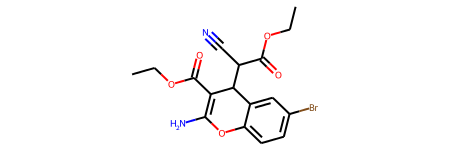

In [2900]:
M48= mol_list [47]
M48

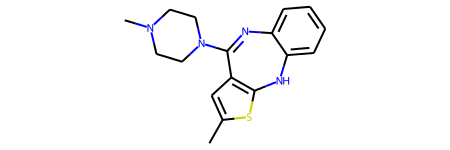

In [2901]:
M49= mol_list [48]
M49

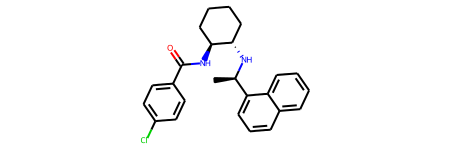

In [2902]:
M50= mol_list [49]
M50

In [2903]:
bi = {}

fp= AllChem.GetMorganFingerprintAsBitVect(M1, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[62,
 64,
 80,
 90,
 119,
 122,
 128,
 175,
 184,
 191,
 219,
 325,
 328,
 333,
 356,
 364,
 378,
 383,
 392,
 476,
 491,
 500,
 549,
 579,
 583,
 637,
 667,
 726,
 759,
 806,
 820,
 842,
 843,
 849,
 855,
 904,
 913,
 984]

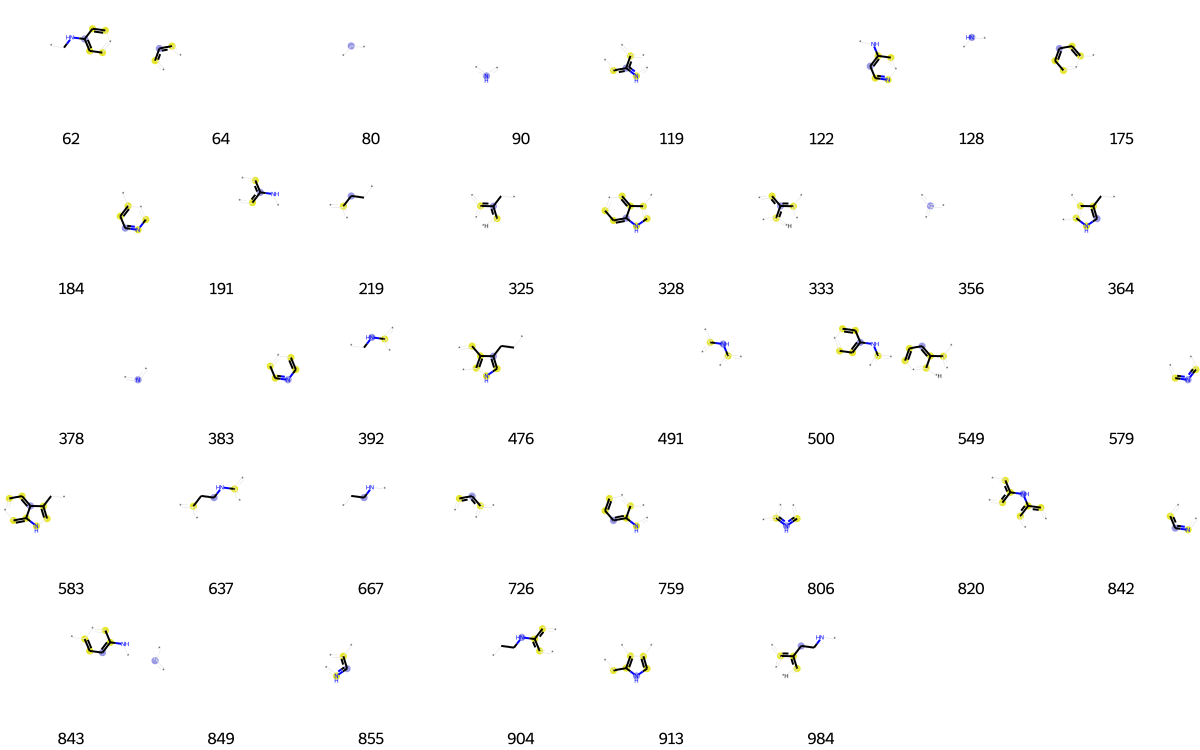

In [2904]:
prints = [(M1, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp.GetOnBits ()])

In [2905]:
bi = {}

fp2= AllChem.GetMorganFingerprintAsBitVect(M2, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp2, fp_arr)
np.nonzero(fp_arr)
list(fp2.GetOnBits())

[4,
 15,
 29,
 36,
 39,
 80,
 130,
 138,
 143,
 150,
 211,
 212,
 214,
 231,
 233,
 248,
 264,
 270,
 301,
 311,
 327,
 336,
 356,
 389,
 451,
 456,
 474,
 484,
 497,
 514,
 556,
 573,
 578,
 583,
 649,
 656,
 682,
 726,
 736,
 750,
 784,
 807,
 849,
 889,
 899,
 900,
 908,
 926,
 935,
 956,
 998,
 1019]

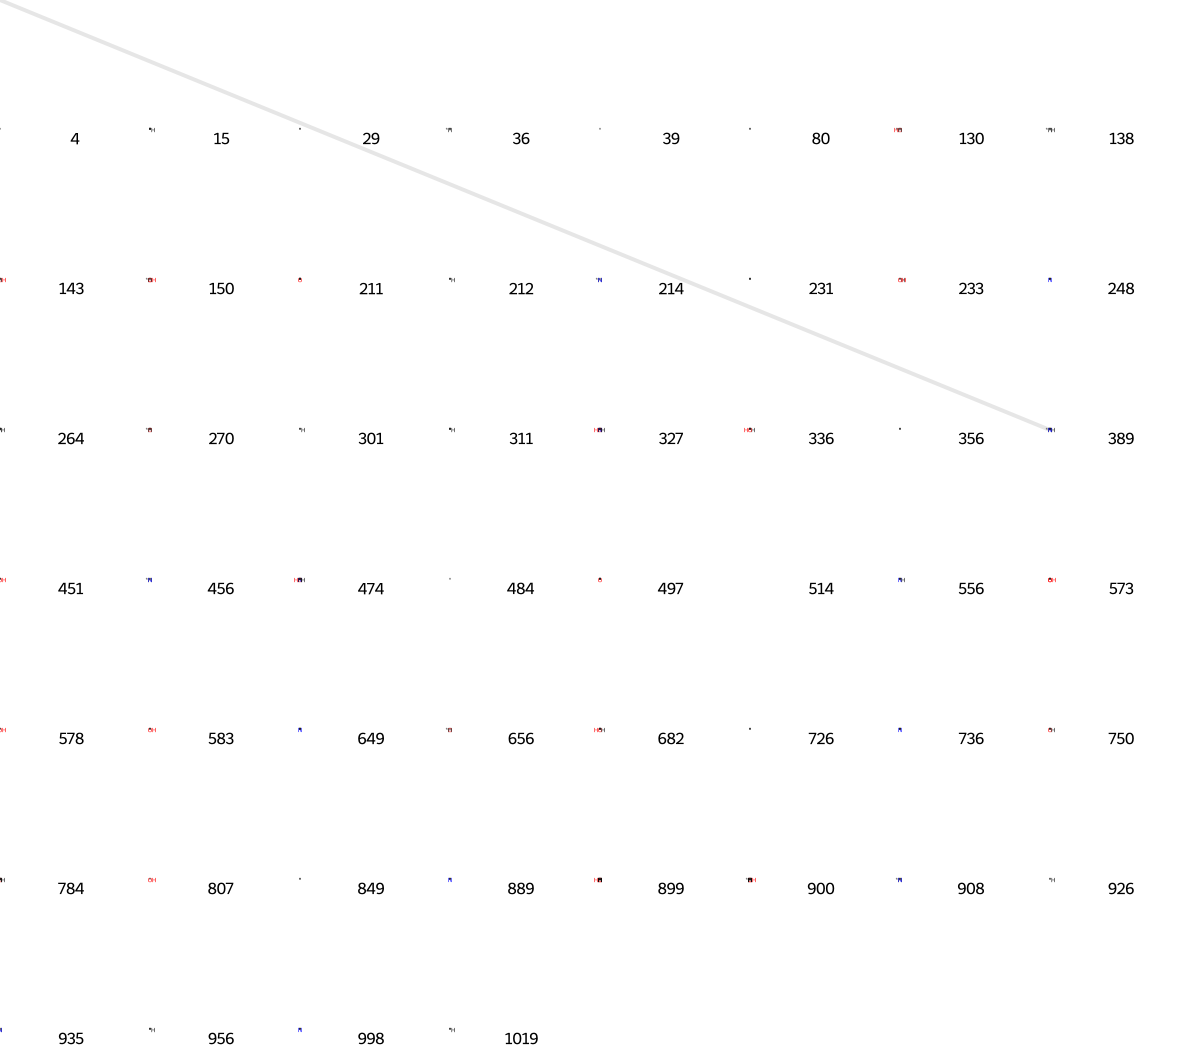

In [2906]:
prints = [(M2, x, bi) for x in fp2.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp2.GetOnBits ()])

In [2907]:
bi = {}

fp3= AllChem.GetMorganFingerprintAsBitVect(M3, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp3, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[7,
 72,
 102,
 112,
 128,
 186,
 200,
 237,
 242,
 305,
 356,
 360,
 389,
 446,
 561,
 650,
 659,
 674,
 790,
 792,
 807,
 849,
 851,
 875,
 893,
 945,
 964,
 1011]

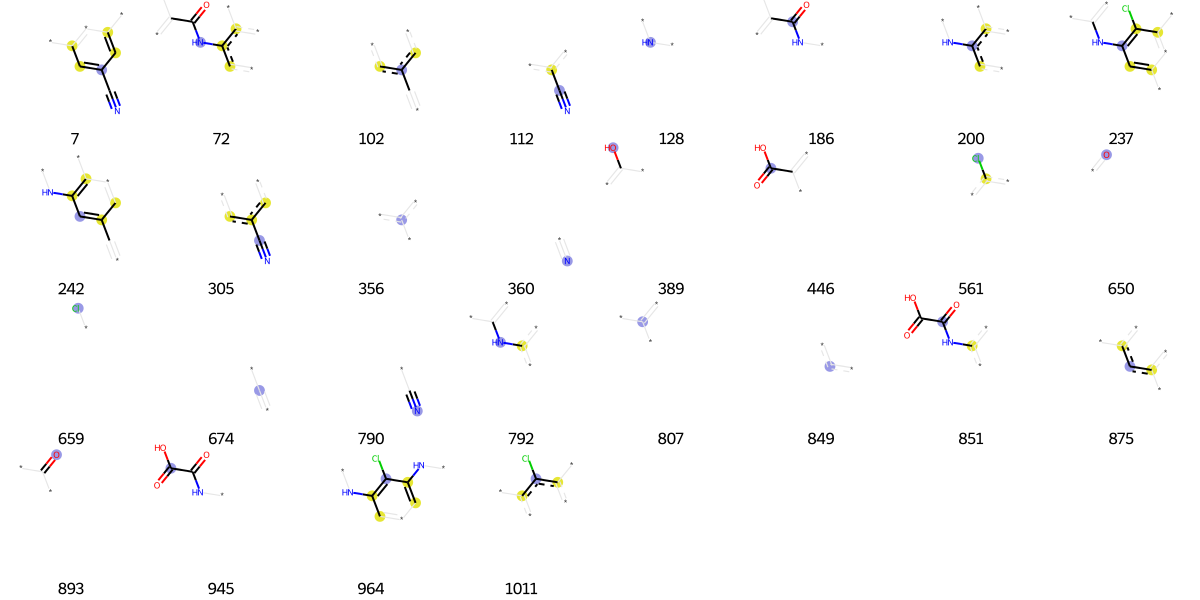

In [2908]:
prints = [(M3, x, bi) for x in fp3.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp3.GetOnBits ()])

In [2909]:
bi = {}

fp4= AllChem.GetMorganFingerprintAsBitVect(M4, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp4, fp_arr)
np.nonzero(fp_arr)
list(fp4.GetOnBits())

[1,
 33,
 80,
 117,
 128,
 229,
 245,
 321,
 389,
 435,
 600,
 650,
 675,
 736,
 798,
 807,
 820,
 840,
 865,
 893,
 1017]

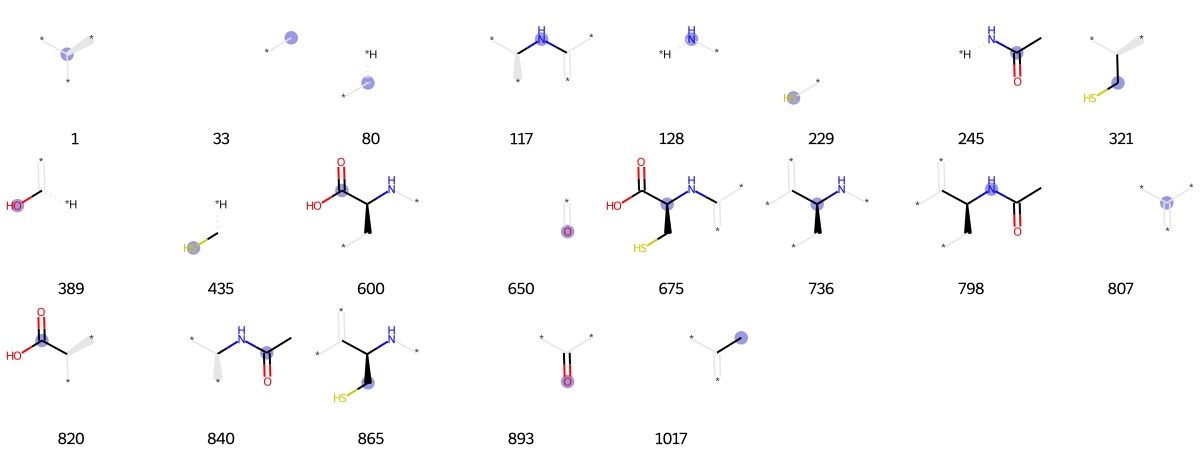

In [2910]:
prints = [(M4, x, bi) for x in fp4.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp4.GetOnBits ()])

In [2911]:
bi = {}

fp5= AllChem.GetMorganFingerprintAsBitVect(M5, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp5, fp_arr)
np.nonzero(fp_arr)
list(fp5.GetOnBits())

[24,
 64,
 80,
 90,
 123,
 128,
 131,
 136,
 140,
 175,
 255,
 285,
 310,
 323,
 356,
 360,
 361,
 378,
 389,
 392,
 428,
 441,
 448,
 471,
 638,
 708,
 726,
 730,
 736,
 827,
 831,
 842,
 849,
 896,
 933,
 940,
 961,
 980,
 1001]

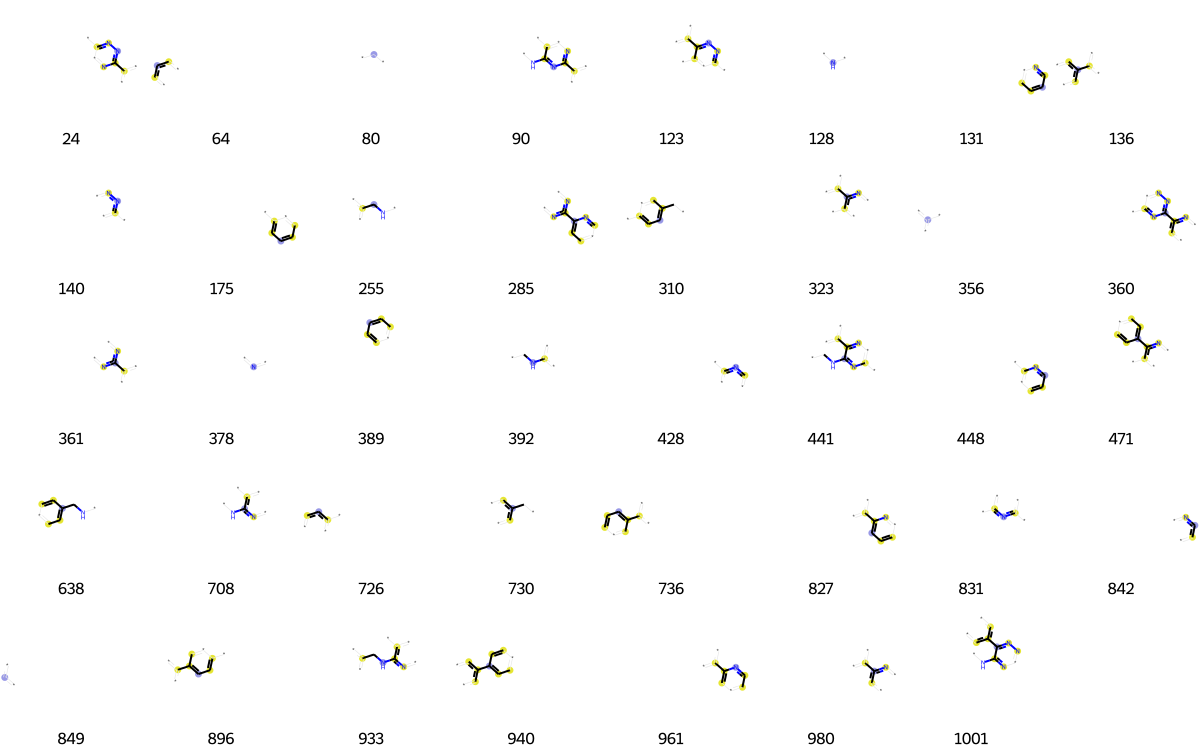

In [2912]:
prints = [(M5, x, bi) for x in fp5.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp5.GetOnBits ()])

In [2913]:
bi = {}

fp6= AllChem.GetMorganFingerprintAsBitVect(M6, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp6, fp_arr)
np.nonzero(fp_arr)
list(fp6.GetOnBits())

[65,
 140,
 144,
 147,
 198,
 319,
 350,
 351,
 356,
 396,
 433,
 452,
 480,
 531,
 650,
 715,
 725,
 726,
 780,
 807,
 849,
 888,
 993]

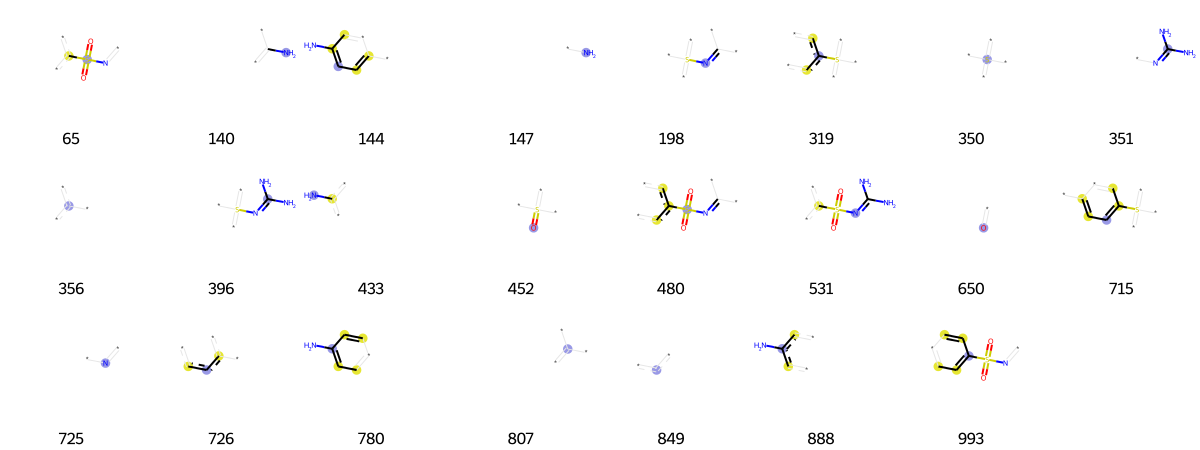

In [2914]:
prints = [(M6, x, bi) for x in fp6.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp6.GetOnBits ()])

In [2915]:
bi = {}

fp7= AllChem.GetMorganFingerprintAsBitVect(M7, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp7, fp_arr)
np.nonzero(fp_arr)
list(fp7.GetOnBits())

[33,
 80,
 270,
 289,
 294,
 356,
 361,
 434,
 571,
 578,
 673,
 688,
 726,
 745,
 754,
 807,
 849,
 898]

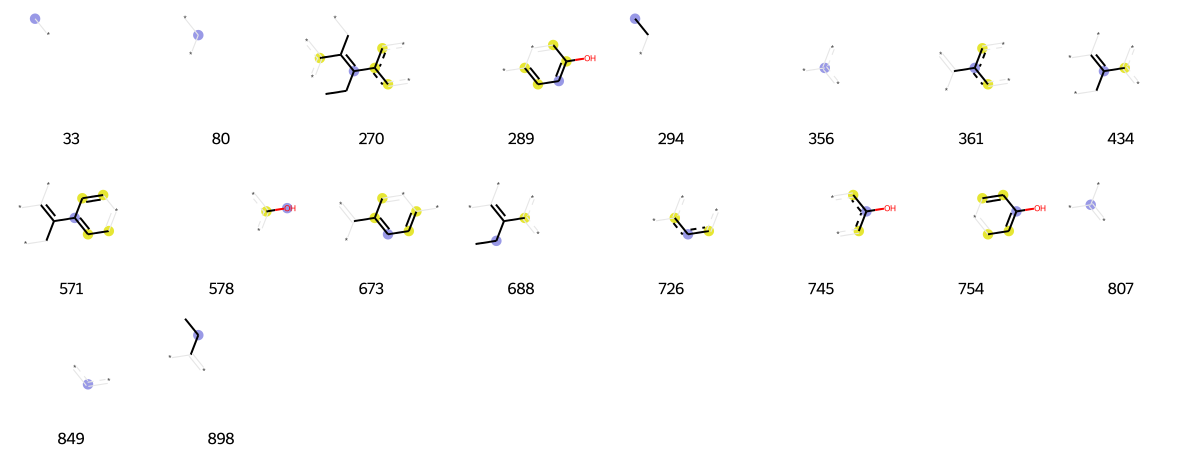

In [2916]:
prints = [(M7, x, bi) for x in fp7.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp7.GetOnBits ()])

In [2917]:
bi = {}

fp8= AllChem.GetMorganFingerprintAsBitVect(M8, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp8, fp_arr)
np.nonzero(fp_arr)
list(fp8.GetOnBits())

[10,
 13,
 20,
 33,
 43,
 64,
 74,
 80,
 85,
 102,
 121,
 129,
 147,
 158,
 204,
 209,
 211,
 233,
 300,
 322,
 333,
 356,
 361,
 378,
 381,
 407,
 412,
 417,
 424,
 428,
 433,
 435,
 456,
 458,
 474,
 484,
 486,
 511,
 629,
 656,
 672,
 676,
 687,
 695,
 718,
 726,
 753,
 767,
 781,
 787,
 801,
 804,
 825,
 831,
 833,
 841,
 849,
 891,
 893,
 902,
 926,
 932,
 935,
 964,
 1005]

In [2918]:
bi = {}

fp9= AllChem.GetMorganFingerprintAsBitVect(M9, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp9, fp_arr)
np.nonzero(fp_arr)
list(fp9.GetOnBits())

[1,
 14,
 29,
 33,
 60,
 64,
 79,
 80,
 90,
 119,
 147,
 196,
 232,
 241,
 283,
 322,
 325,
 328,
 333,
 356,
 364,
 383,
 428,
 477,
 514,
 543,
 556,
 567,
 654,
 656,
 675,
 695,
 718,
 726,
 728,
 745,
 786,
 806,
 849,
 855,
 874,
 875,
 913,
 915,
 946,
 1007]

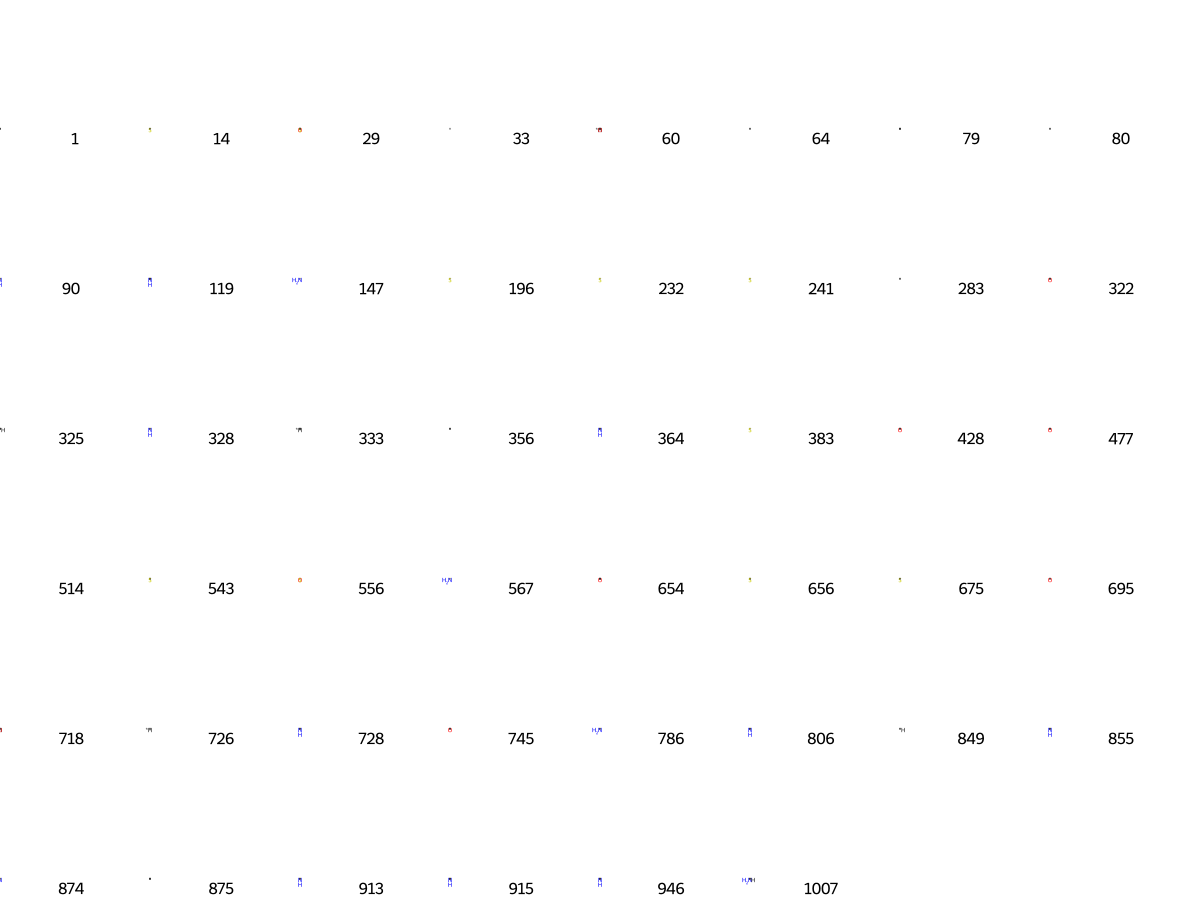

In [2919]:
prints = [(M9, x, bi) for x in fp9.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp9.GetOnBits ()])

In [2920]:
bi = {}

fp10= AllChem.GetMorganFingerprintAsBitVect(M10, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp10, fp_arr)
np.nonzero(fp_arr)
list(fp10.GetOnBits())

[33,
 45,
 64,
 77,
 80,
 97,
 121,
 175,
 239,
 261,
 276,
 301,
 314,
 319,
 333,
 356,
 378,
 387,
 398,
 422,
 428,
 431,
 432,
 514,
 515,
 549,
 564,
 587,
 650,
 664,
 698,
 702,
 714,
 719,
 723,
 726,
 784,
 790,
 824,
 842,
 849,
 908,
 917,
 926,
 928,
 935,
 1011,
 1019]

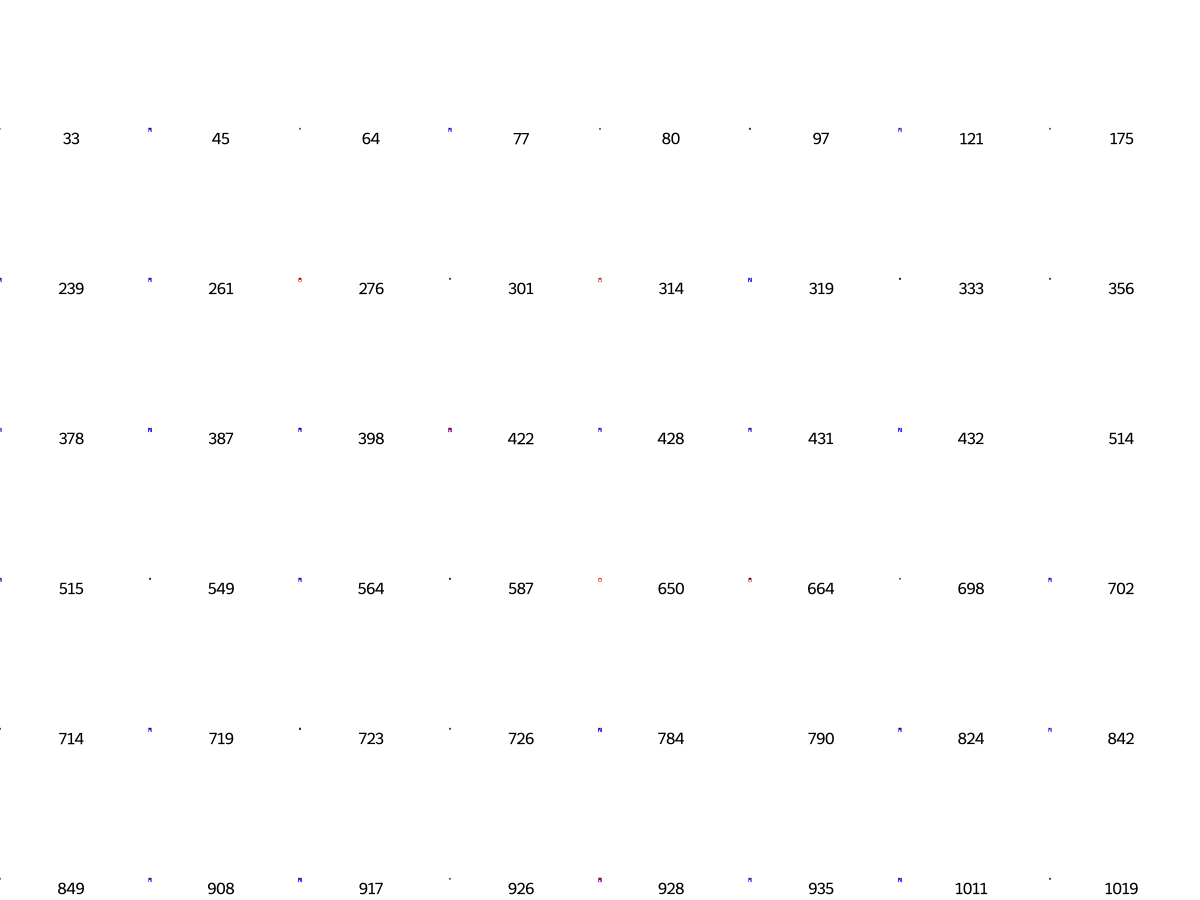

In [2921]:
prints = [(M10, x, bi) for x in fp10.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp10.GetOnBits ()])

In [2922]:
bi = {}

fp11= AllChem.GetMorganFingerprintAsBitVect(M11, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp11, fp_arr)
np.nonzero(fp_arr)
list(fp11.GetOnBits())

[1,
 73,
 80,
 108,
 192,
 229,
 321,
 350,
 420,
 435,
 452,
 592,
 636,
 650,
 777,
 807,
 852,
 883]

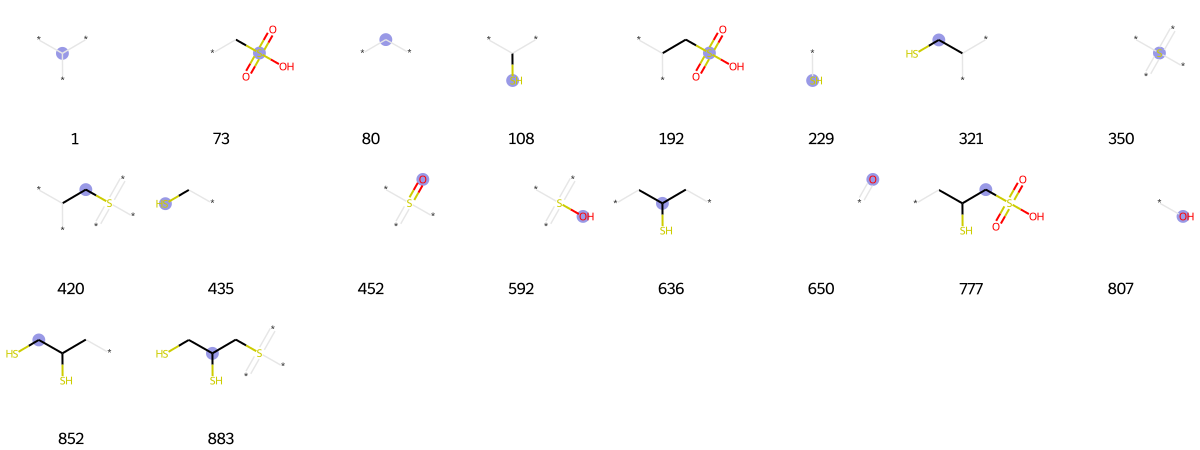

In [2923]:
prints = [(M11, x, bi) for x in fp11.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp11.GetOnBits ()])

In [2924]:
bi = {}

fp12= AllChem.GetMorganFingerprintAsBitVect(M12, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp12, fp_arr)
np.nonzero(fp_arr)
list(fp12.GetOnBits())

[1,
 25,
 33,
 64,
 74,
 80,
 102,
 118,
 175,
 227,
 294,
 322,
 356,
 361,
 381,
 389,
 407,
 421,
 428,
 456,
 465,
 484,
 594,
 597,
 603,
 650,
 658,
 664,
 669,
 673,
 687,
 695,
 718,
 726,
 767,
 772,
 801,
 807,
 849,
 893,
 898,
 926,
 935,
 1014]

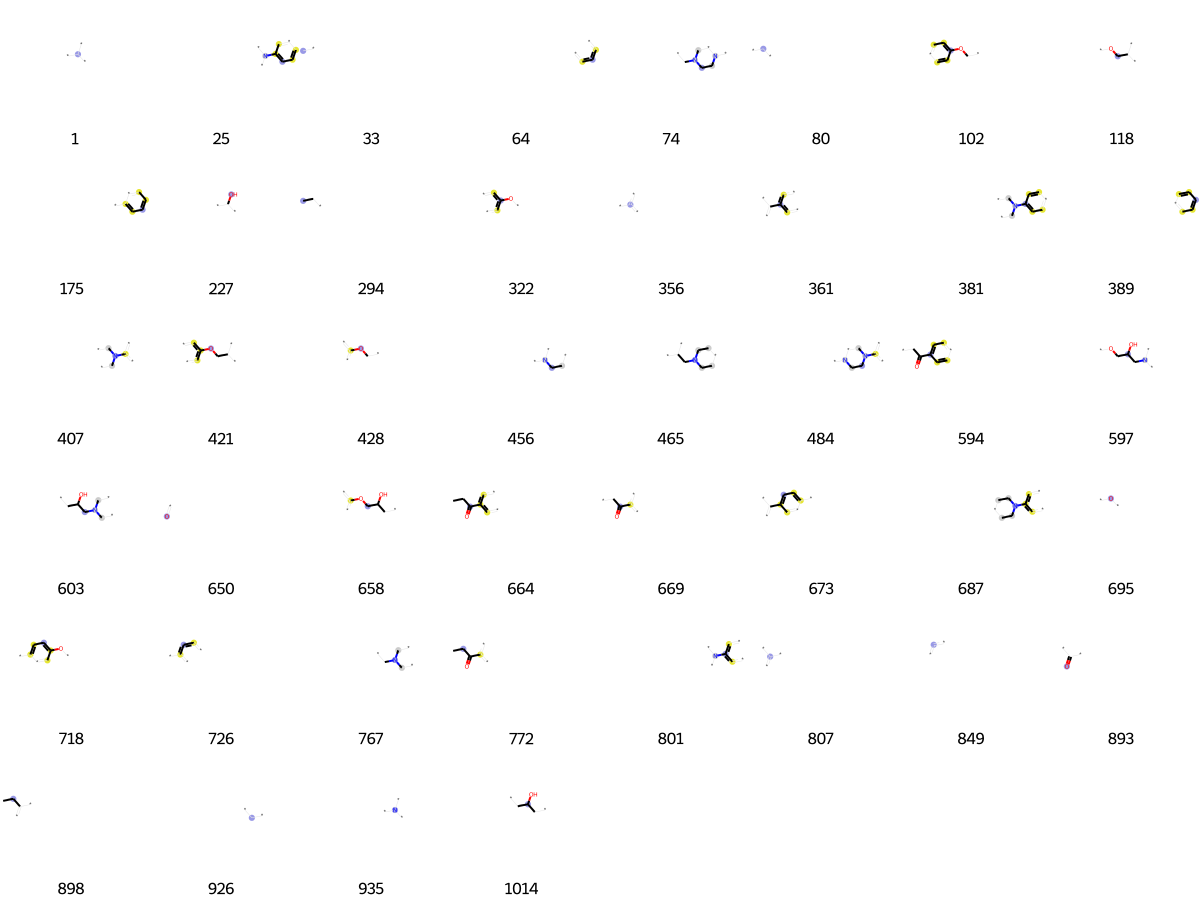

In [2925]:
prints = [(M12, x, bi) for x in fp12.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp12.GetOnBits ()])

In [2926]:
bi = {}

fp13= AllChem.GetMorganFingerprintAsBitVect(M13, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp13, fp_arr)
np.nonzero(fp_arr)
list(fp13.GetOnBits())

[1,
 33,
 64,
 80,
 114,
 128,
 175,
 236,
 322,
 341,
 356,
 383,
 389,
 393,
 406,
 429,
 514,
 538,
 557,
 641,
 664,
 667,
 671,
 684,
 695,
 718,
 726,
 737,
 739,
 809,
 849,
 887,
 904,
 968,
 971,
 1014]

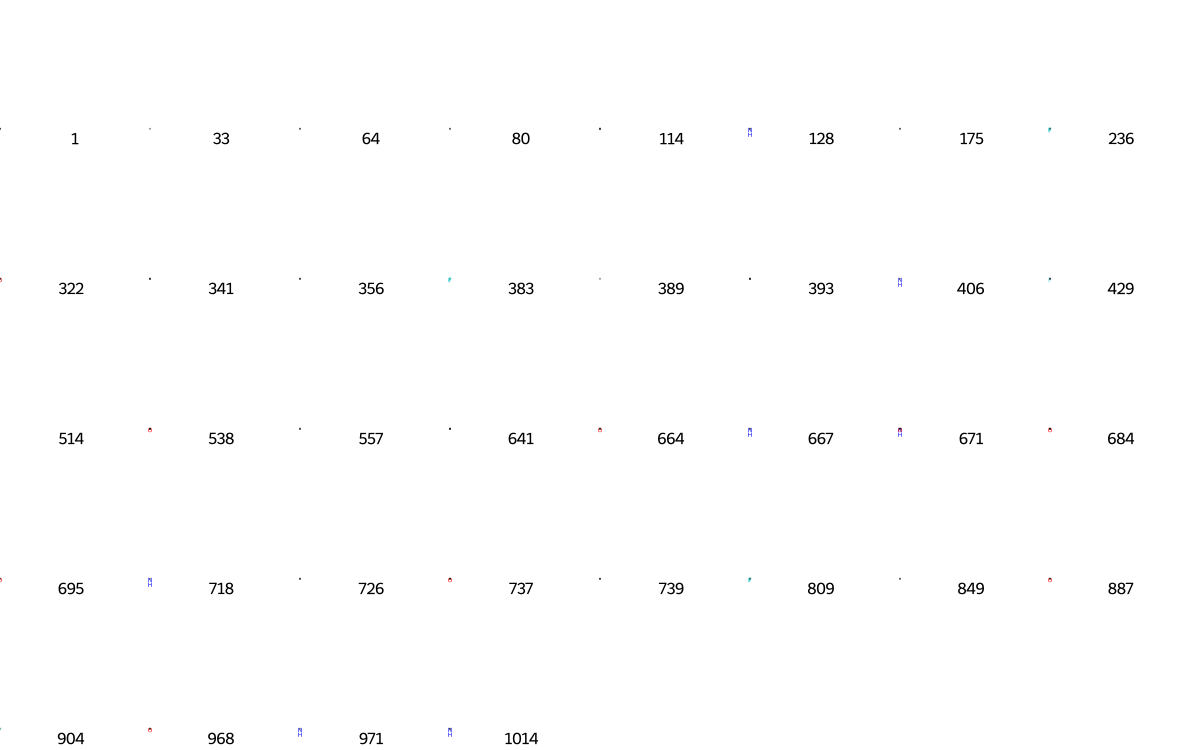

In [2927]:
prints = [(M13, x, bi) for x in fp13.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp13.GetOnBits ()])

In [2928]:
bi = {}

fp14= AllChem.GetMorganFingerprintAsBitVect(M14, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp14, fp_arr)
np.nonzero(fp_arr)
list(fp14.GetOnBits())

[4,
 33,
 34,
 39,
 51,
 80,
 116,
 144,
 158,
 285,
 293,
 301,
 321,
 354,
 389,
 407,
 468,
 507,
 531,
 540,
 545,
 559,
 650,
 661,
 734,
 807,
 827,
 893,
 908,
 926,
 935,
 1009,
 1014,
 1017,
 1019]

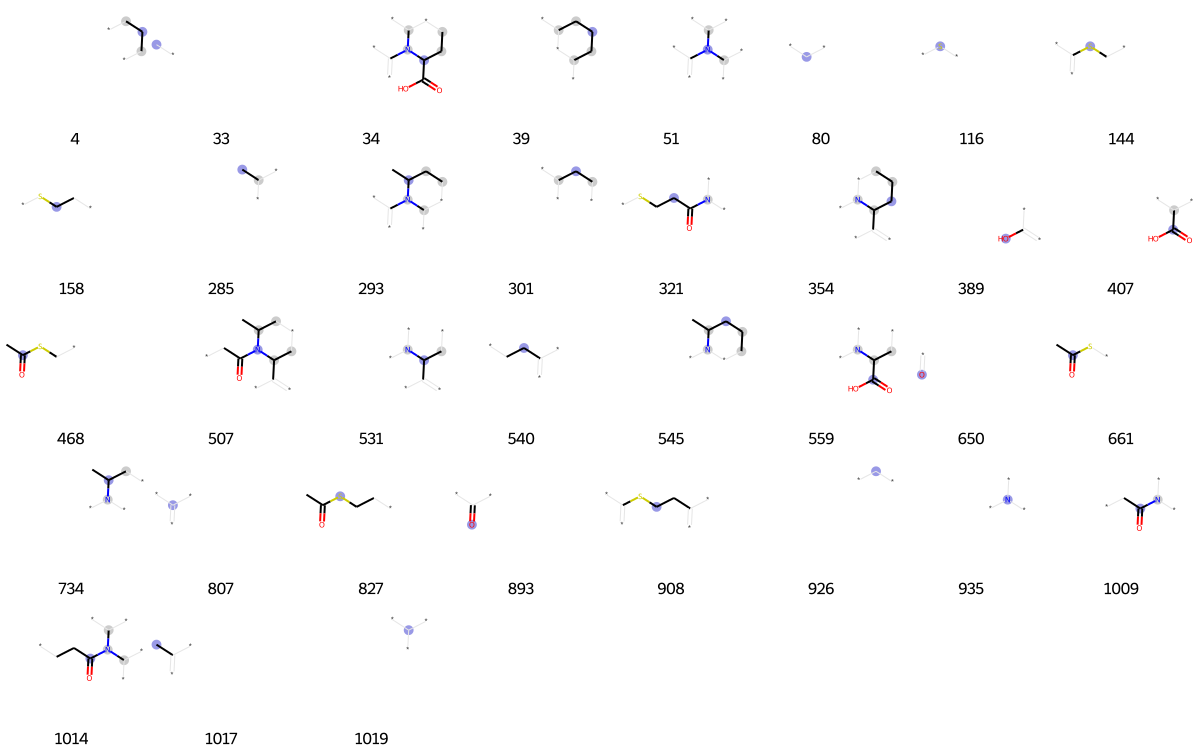

In [2929]:
prints = [(M14, x, bi) for x in fp14.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp14.GetOnBits ()])

In [2930]:
bi = {}

fp15= AllChem.GetMorganFingerprintAsBitVect(M15, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp15, fp_arr)
np.nonzero(fp_arr)
list(fp15.GetOnBits())

[1,
 27,
 57,
 64,
 77,
 80,
 116,
 165,
 175,
 185,
 216,
 231,
 237,
 272,
 310,
 316,
 349,
 356,
 366,
 378,
 389,
 391,
 439,
 494,
 542,
 552,
 561,
 578,
 579,
 630,
 650,
 659,
 667,
 695,
 715,
 726,
 730,
 737,
 745,
 753,
 778,
 805,
 807,
 811,
 816,
 838,
 842,
 843,
 849,
 875,
 898,
 925,
 932,
 935,
 938,
 939,
 960,
 1018]

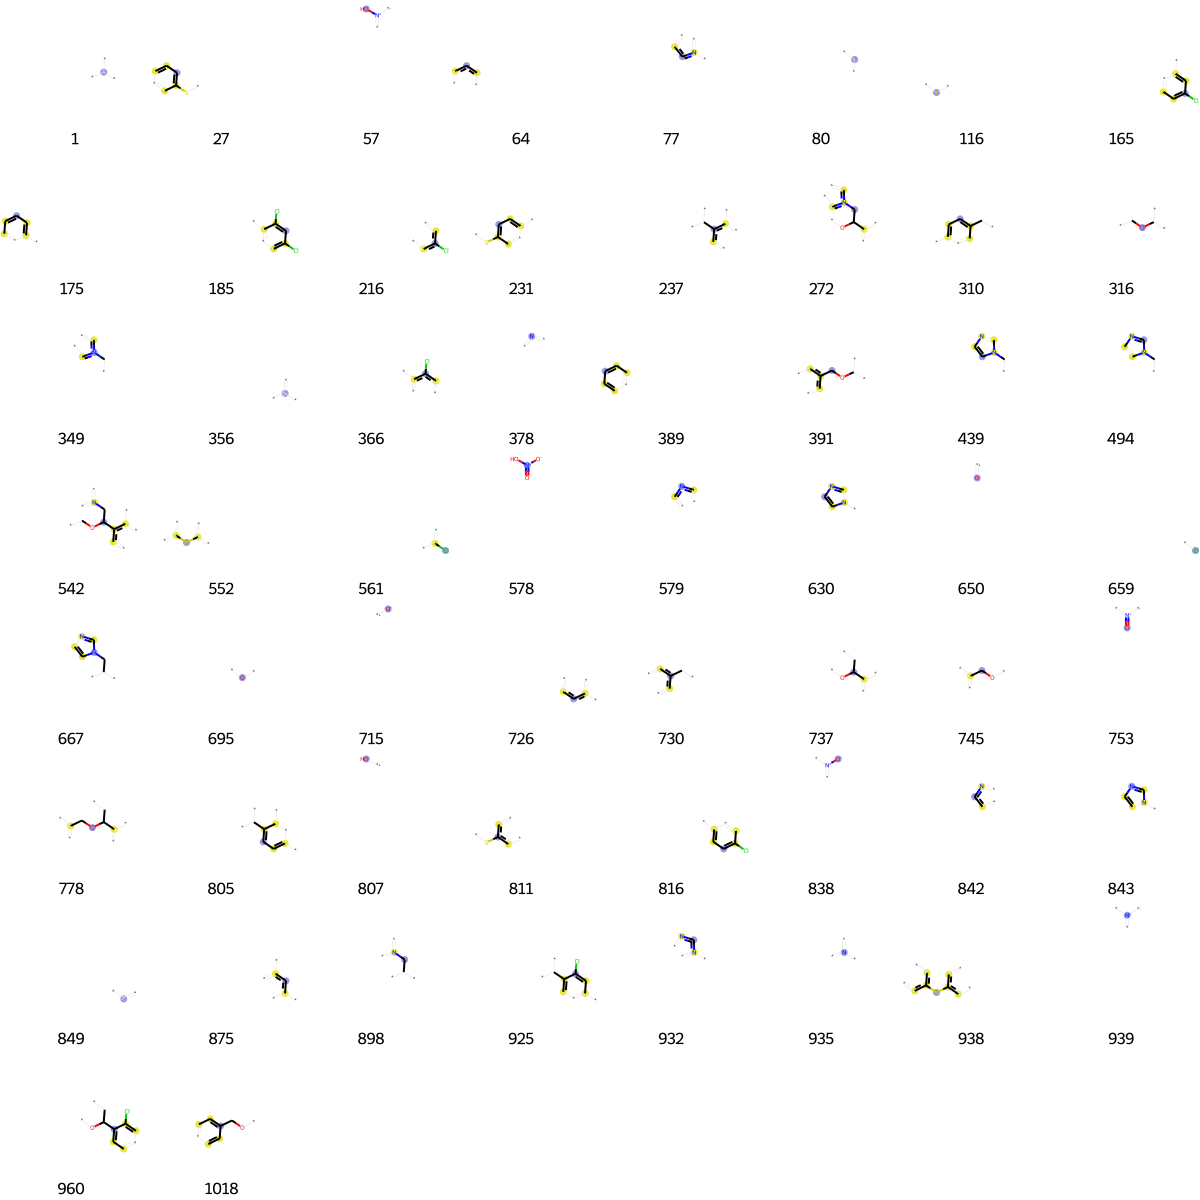

In [2931]:
prints = [(M15, x, bi) for x in fp15.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp15.GetOnBits ()])

In [2932]:
bi = {}

fp16= AllChem.GetMorganFingerprintAsBitVect(M16, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp16, fp_arr)
np.nonzero(fp_arr)
list(fp16.GetOnBits())

[1,
 33,
 79,
 80,
 102,
 114,
 135,
 206,
 283,
 285,
 294,
 295,
 310,
 356,
 392,
 393,
 418,
 467,
 514,
 570,
 599,
 612,
 641,
 656,
 689,
 726,
 730,
 739,
 765,
 767,
 787,
 849,
 857,
 860,
 897,
 898,
 926,
 935,
 1019]

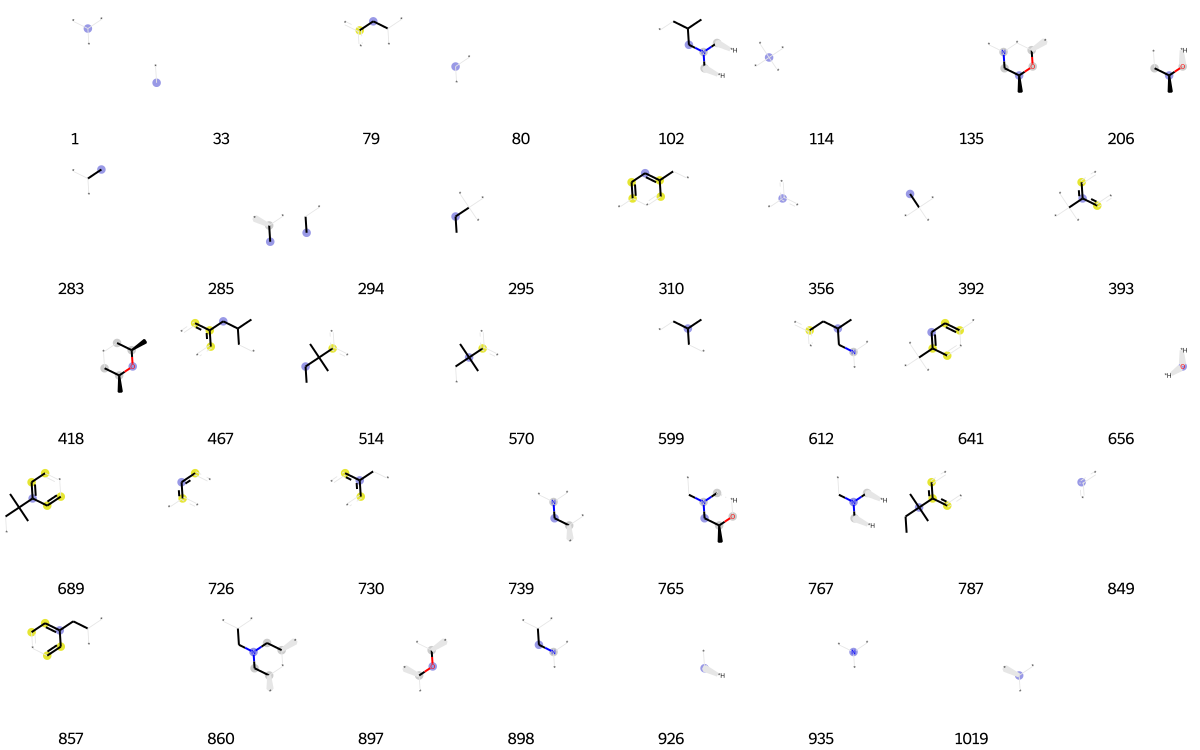

In [2933]:
prints = [(M16, x, bi) for x in fp16.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp16.GetOnBits ()])

In [2934]:
bi = {}

fp17= AllChem.GetMorganFingerprintAsBitVect(M17, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp17, fp_arr)
np.nonzero(fp_arr)
list(fp17.GetOnBits())

[13,
 33,
 64,
 73,
 80,
 98,
 99,
 175,
 189,
 235,
 252,
 257,
 263,
 282,
 289,
 342,
 356,
 362,
 378,
 397,
 404,
 418,
 428,
 429,
 440,
 486,
 494,
 575,
 580,
 615,
 647,
 677,
 695,
 698,
 715,
 726,
 729,
 787,
 818,
 831,
 841,
 842,
 849,
 873,
 887,
 898,
 946,
 984,
 1005]

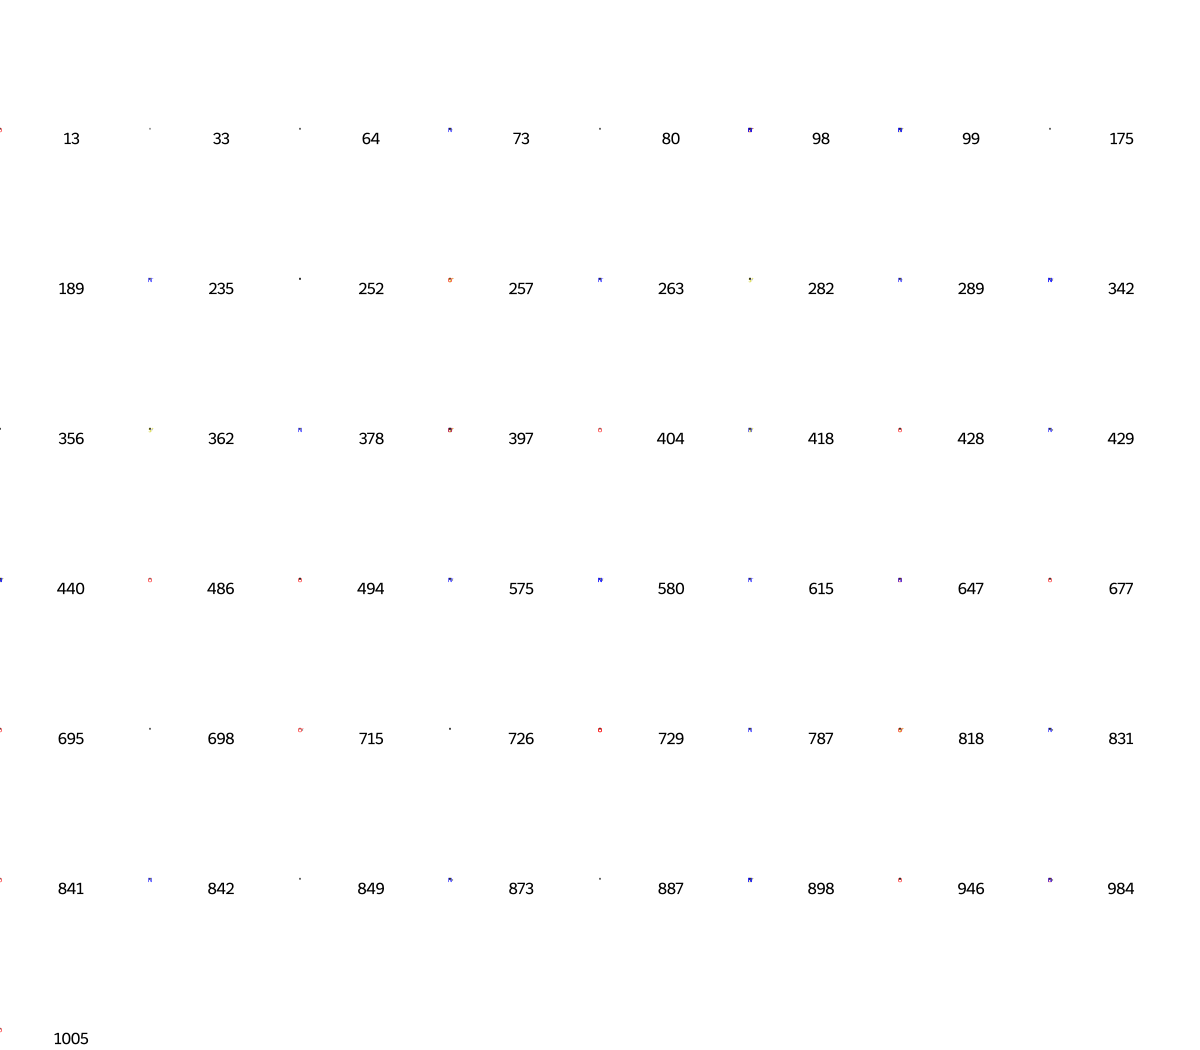

In [2935]:
prints = [(M17, x, bi) for x in fp17.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp17.GetOnBits ()])

In [2936]:
bi = {}

fp19= AllChem.GetMorganFingerprintAsBitVect(M19, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp19, fp_arr)
np.nonzero(fp_arr)
list(fp19.GetOnBits())

[2,
 4,
 33,
 36,
 47,
 90,
 102,
 119,
 123,
 145,
 147,
 149,
 171,
 250,
 255,
 256,
 257,
 277,
 301,
 314,
 356,
 366,
 386,
 391,
 440,
 463,
 505,
 558,
 627,
 650,
 674,
 695,
 698,
 715,
 726,
 751,
 753,
 769,
 779,
 784,
 785,
 790,
 807,
 838,
 849,
 890,
 893,
 926,
 939,
 940,
 961,
 1005,
 1010,
 1019]

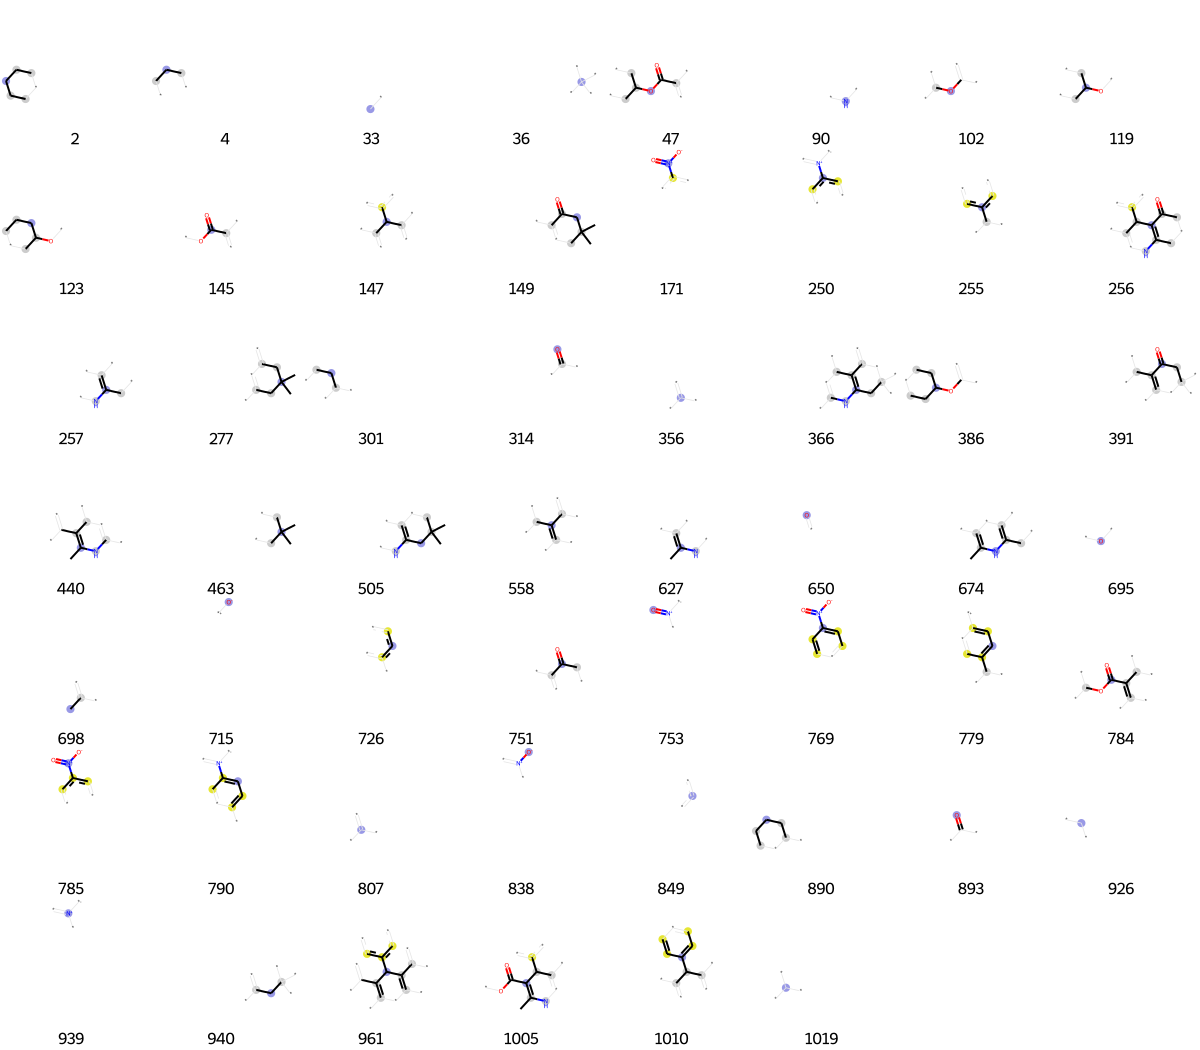

In [2937]:
prints = [(M19, x, bi) for x in fp19.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp19.GetOnBits ()])

In [2938]:
bi = {}

fp20= AllChem.GetMorganFingerprintAsBitVect(M20, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp20, fp_arr)
np.nonzero(fp_arr)
list(fp20.GetOnBits())

[64,
 106,
 119,
 157,
 175,
 189,
 226,
 255,
 356,
 378,
 389,
 390,
 395,
 407,
 456,
 514,
 639,
 640,
 675,
 726,
 739,
 759,
 789,
 849,
 850,
 867,
 890,
 926,
 935,
 983,
 1019]

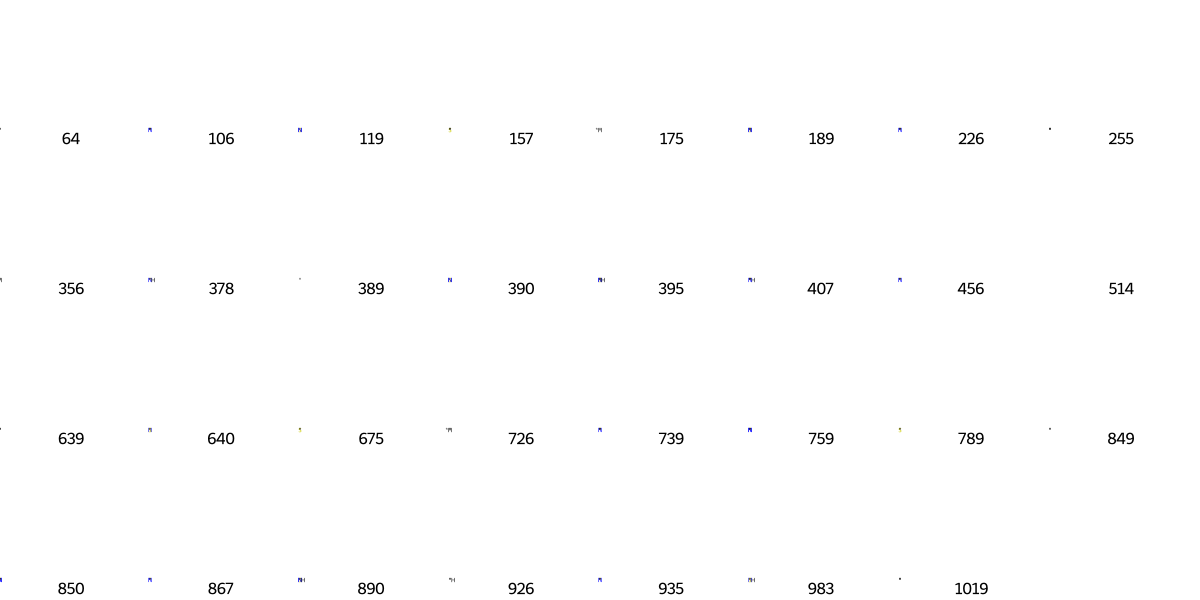

In [2939]:
prints = [(M20, x, bi) for x in fp20.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp20.GetOnBits ()])

In [2940]:
bi = {}

fp21= AllChem.GetMorganFingerprintAsBitVect(M21, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp21, fp_arr)
np.nonzero(fp_arr)
list(fp21.GetOnBits())

[1,
 4,
 5,
 33,
 45,
 208,
 227,
 255,
 283,
 301,
 314,
 356,
 361,
 383,
 388,
 389,
 396,
 419,
 430,
 444,
 456,
 470,
 650,
 656,
 675,
 685,
 687,
 698,
 703,
 711,
 802,
 807,
 834,
 893,
 898,
 926,
 935,
 936,
 950,
 953,
 1011,
 1019]

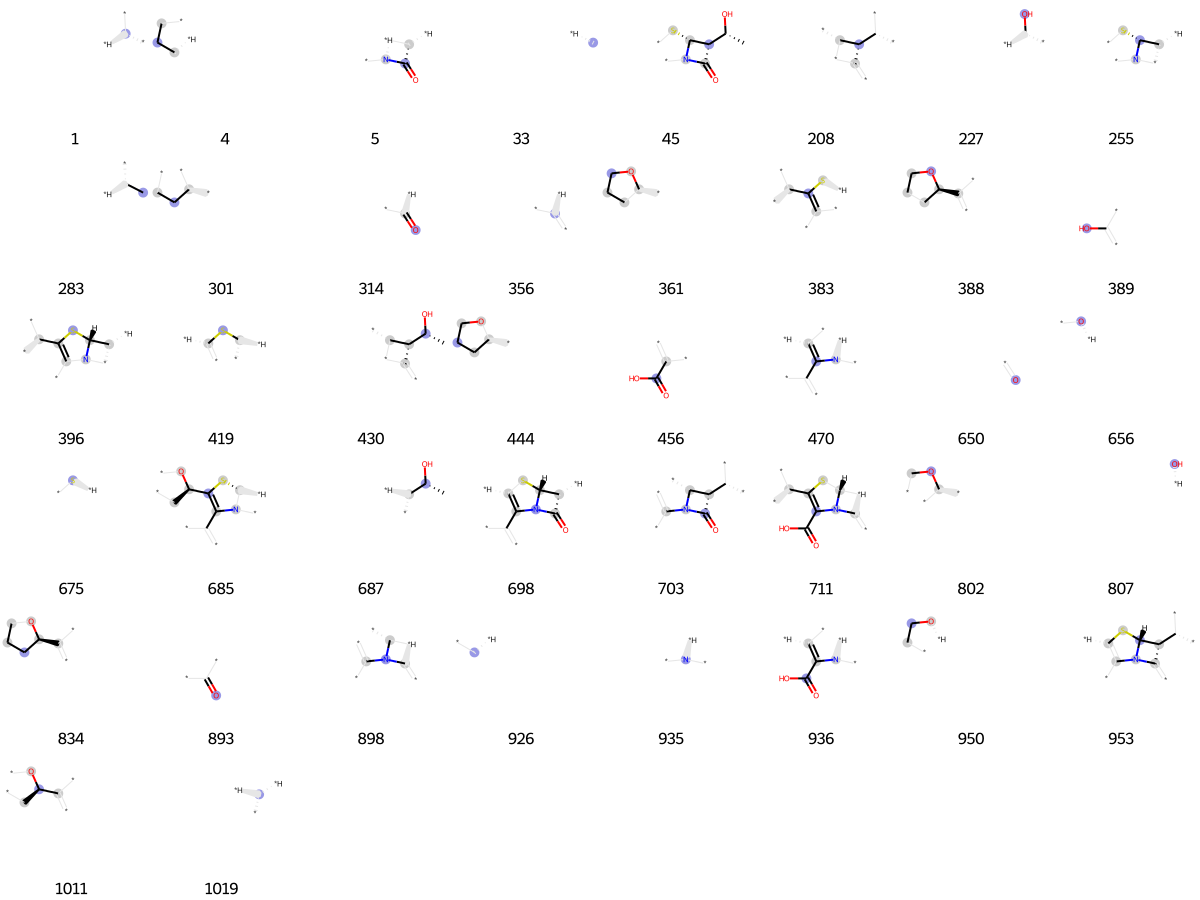

In [2941]:
prints = [(M21, x, bi) for x in fp21.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp21.GetOnBits ()])

In [2942]:
bi = {}

fp22= AllChem.GetMorganFingerprintAsBitVect(M22, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp22, fp_arr)
np.nonzero(fp_arr)
list(fp22.GetOnBits())

[1,
 33,
 64,
 75,
 80,
 104,
 119,
 175,
 202,
 238,
 294,
 305,
 314,
 333,
 341,
 356,
 368,
 389,
 444,
 520,
 531,
 549,
 557,
 578,
 580,
 602,
 650,
 652,
 656,
 726,
 784,
 807,
 849,
 971]

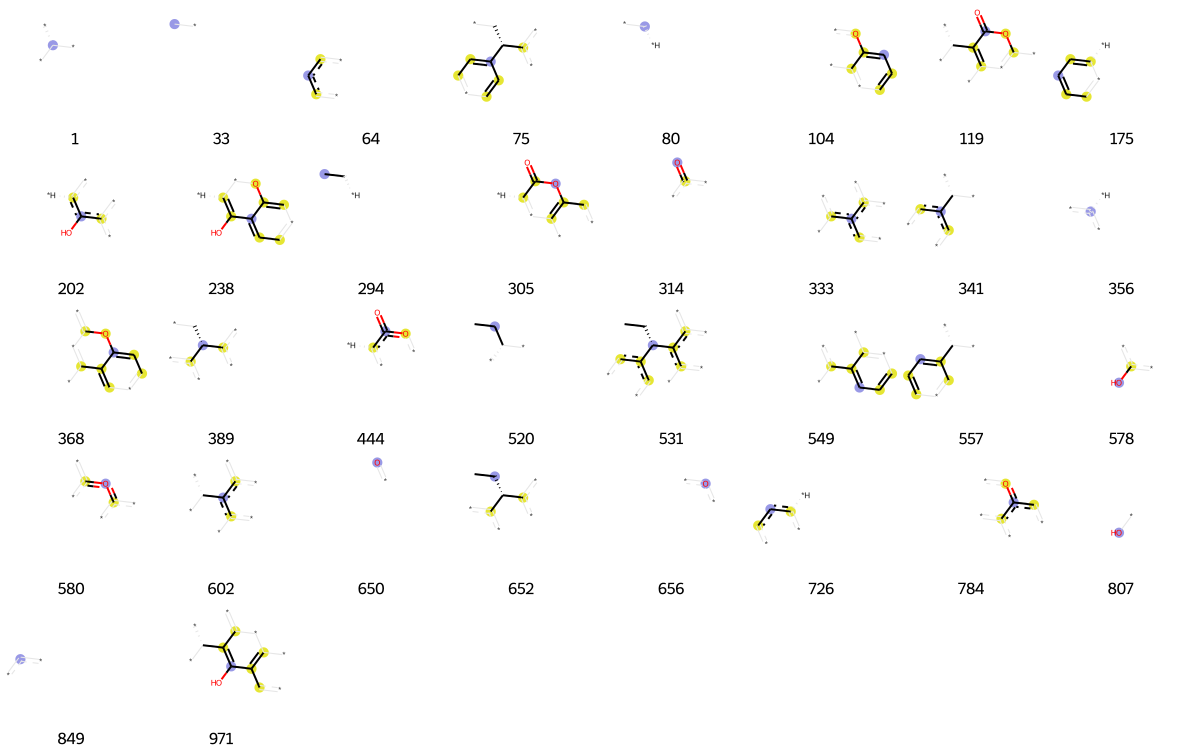

In [2943]:
prints = [(M22, x, bi) for x in fp22.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp22.GetOnBits ()])

In [2944]:
bi = {}

fp23= AllChem.GetMorganFingerprintAsBitVect(M23, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp23, fp_arr)
np.nonzero(fp_arr)
list(fp23.GetOnBits())

[1,
 64,
 97,
 110,
 114,
 117,
 128,
 171,
 175,
 184,
 191,
 209,
 216,
 237,
 284,
 314,
 341,
 354,
 356,
 388,
 389,
 412,
 443,
 461,
 557,
 558,
 573,
 605,
 650,
 659,
 679,
 699,
 715,
 716,
 726,
 753,
 757,
 792,
 803,
 807,
 816,
 838,
 843,
 849,
 875,
 893,
 904,
 936,
 939,
 954,
 1014]

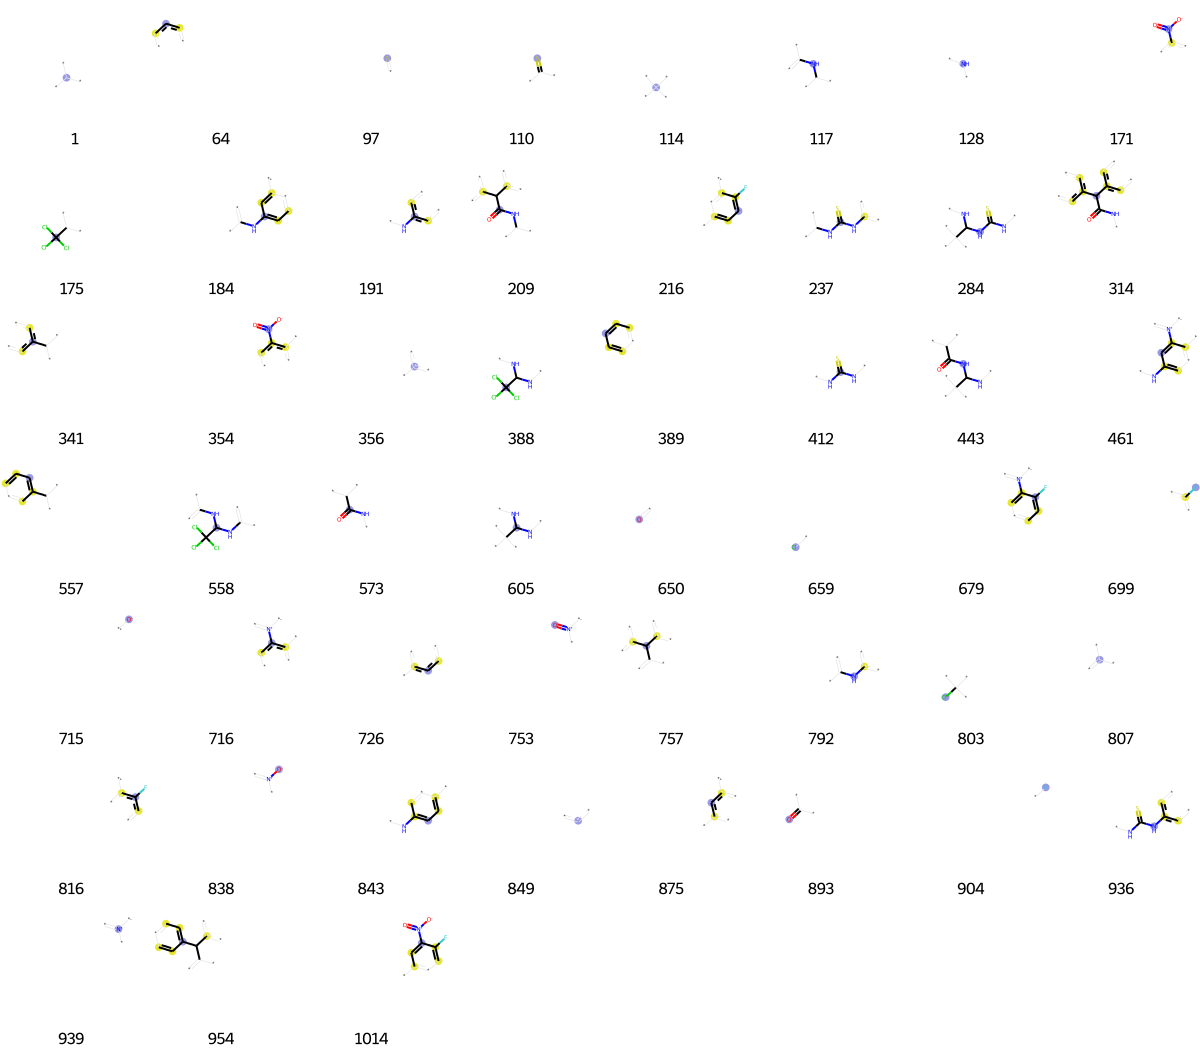

In [2945]:
prints = [(M23, x, bi) for x in fp23.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp23.GetOnBits ()])

In [2946]:
bi = {}

fp24= AllChem.GetMorganFingerprintAsBitVect(M24, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp24, fp_arr)
np.nonzero(fp_arr)
list(fp24.GetOnBits())

[1,
 46,
 77,
 80,
 165,
 185,
 216,
 237,
 272,
 310,
 316,
 349,
 356,
 366,
 378,
 391,
 439,
 494,
 542,
 561,
 579,
 630,
 659,
 667,
 695,
 726,
 730,
 737,
 745,
 778,
 805,
 816,
 842,
 843,
 849,
 875,
 898,
 925,
 932,
 935,
 960,
 1018]

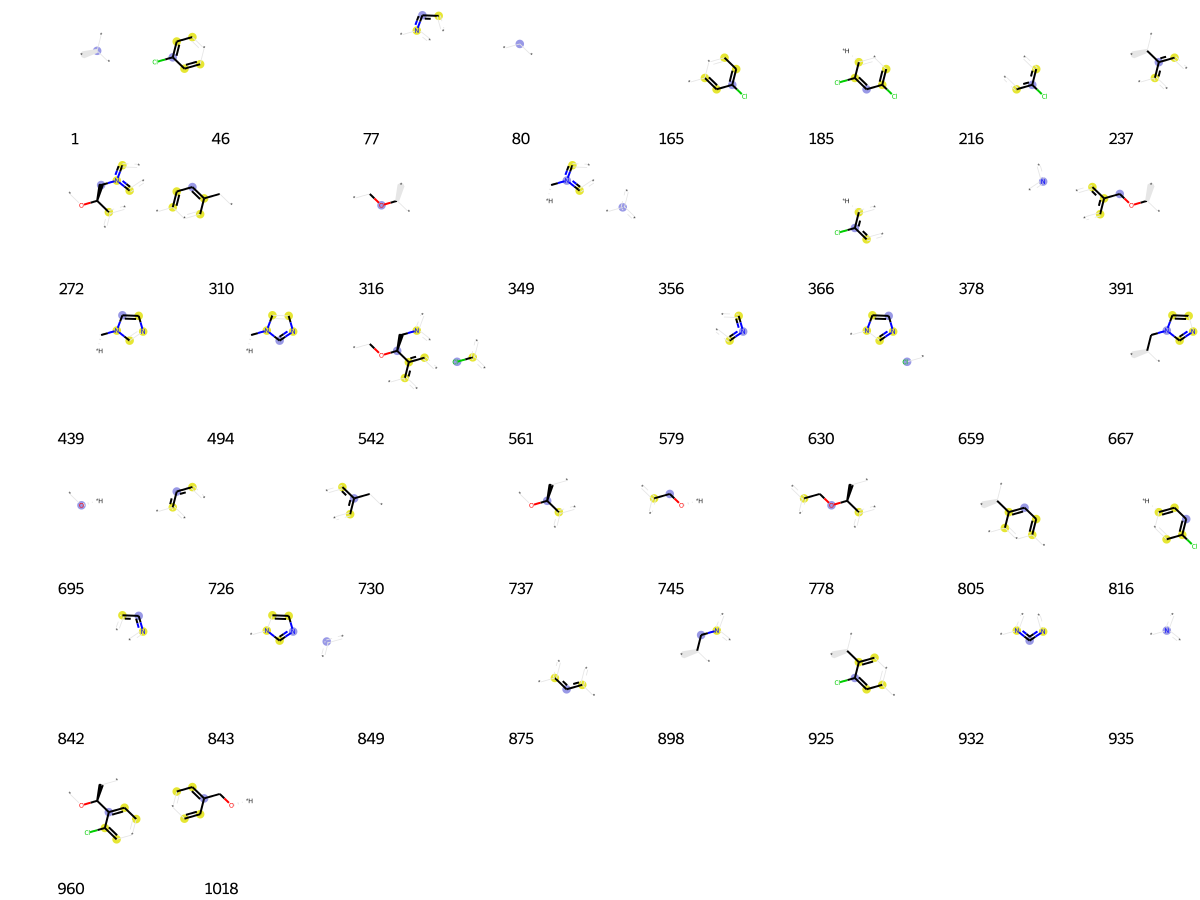

In [2947]:
prints = [(M24, x, bi) for x in fp24.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp24.GetOnBits ()])

In [2948]:
bi = {}

fp25= AllChem.GetMorganFingerprintAsBitVect(M25, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp25, fp_arr)
np.nonzero(fp_arr)
list(fp25.GetOnBits())

[32,
 80,
 138,
 210,
 222,
 233,
 432,
 463,
 492,
 519,
 576,
 588,
 610,
 656,
 740,
 807,
 820,
 836,
 897,
 904,
 1019]

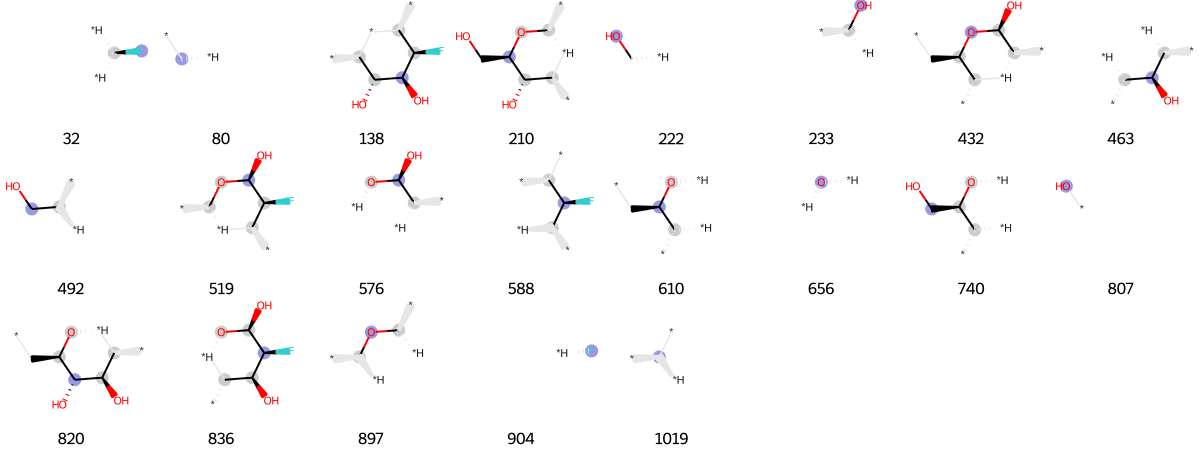

In [2949]:
prints = [(M25, x, bi) for x in fp25.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp25.GetOnBits ()])

In [2950]:
bi = {}

fp26= AllChem.GetMorganFingerprintAsBitVect(M26, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp26, fp_arr)
np.nonzero(fp_arr)
list(fp26.GetOnBits())

[3,
 19,
 26,
 59,
 64,
 90,
 104,
 116,
 206,
 238,
 255,
 279,
 297,
 301,
 356,
 378,
 437,
 453,
 488,
 511,
 519,
 562,
 570,
 579,
 598,
 622,
 639,
 646,
 699,
 726,
 749,
 754,
 767,
 816,
 837,
 842,
 849,
 857,
 869,
 875,
 886,
 904,
 926,
 955,
 1019]

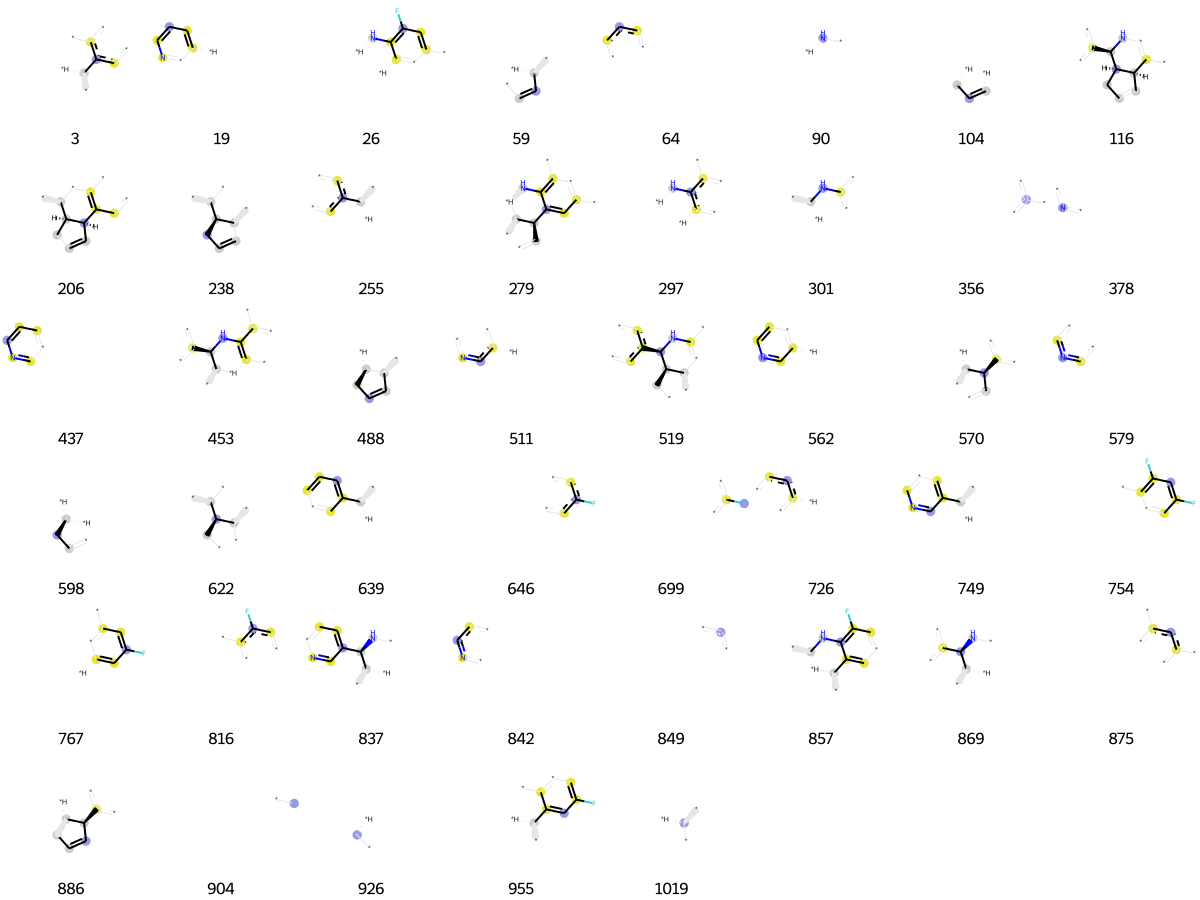

In [2951]:
prints = [(M26, x, bi) for x in fp26.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp26.GetOnBits ()])

In [2952]:
bi = {}

fp27= AllChem.GetMorganFingerprintAsBitVect(M27, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp27, fp_arr)
np.nonzero(fp_arr)
list(fp27.GetOnBits())

[1,
 33,
 41,
 64,
 80,
 102,
 119,
 147,
 175,
 221,
 222,
 268,
 278,
 282,
 294,
 341,
 356,
 376,
 380,
 381,
 389,
 396,
 449,
 482,
 496,
 557,
 575,
 577,
 591,
 601,
 650,
 656,
 658,
 670,
 695,
 721,
 726,
 745,
 785,
 794,
 803,
 807,
 849,
 887,
 893,
 897,
 926,
 931,
 1019]

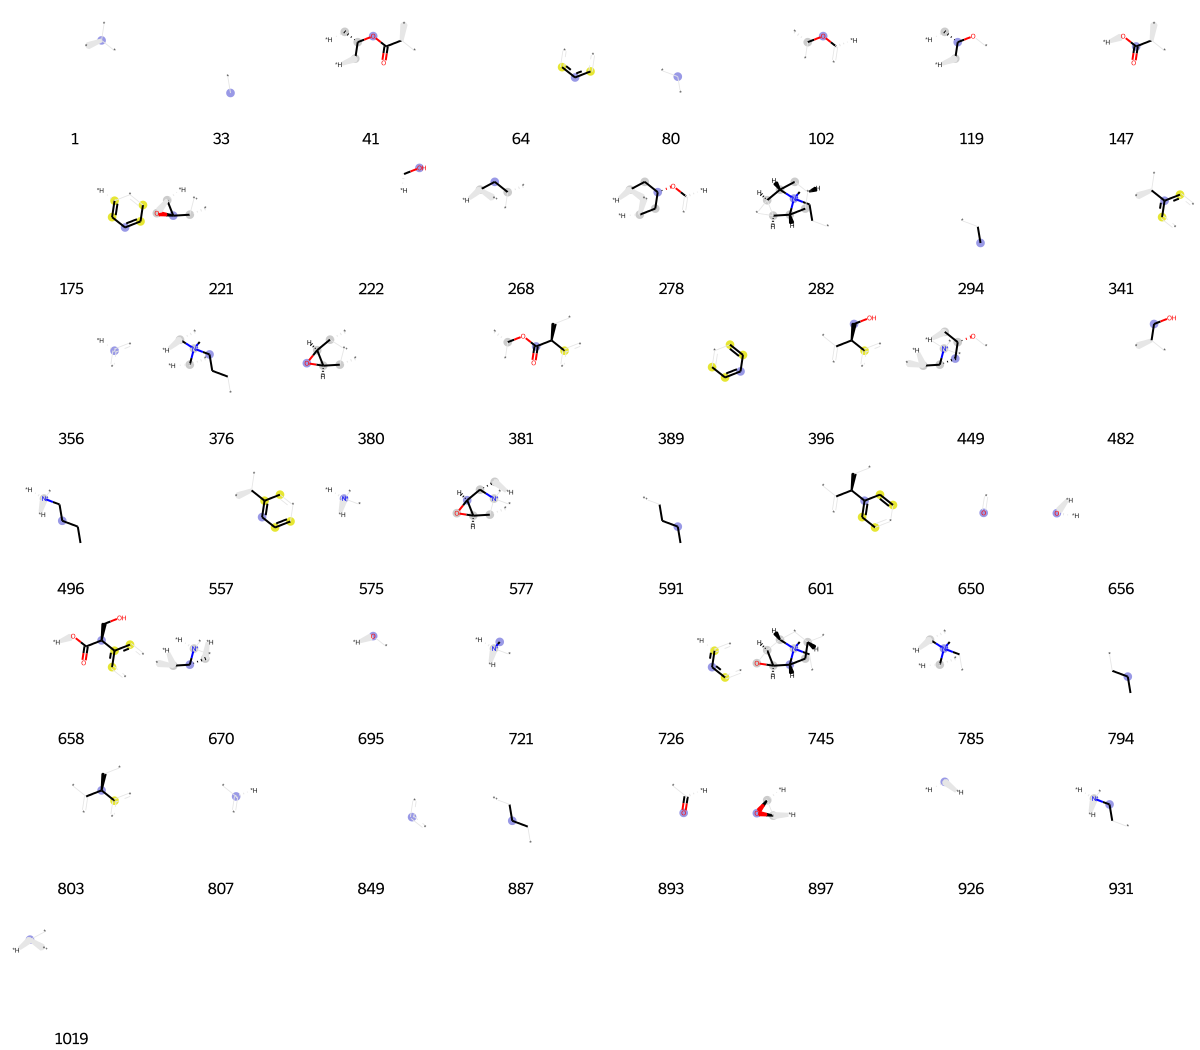

In [2953]:
prints = [(M27, x, bi) for x in fp27.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp27.GetOnBits ()])

In [2954]:
bi = {}

fp28= AllChem.GetMorganFingerprintAsBitVect(M28, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp28, fp_arr)
np.nonzero(fp_arr)
list(fp28.GetOnBits())

[1,
 5,
 14,
 18,
 33,
 36,
 67,
 125,
 126,
 128,
 130,
 181,
 231,
 233,
 250,
 255,
 314,
 341,
 356,
 362,
 387,
 389,
 407,
 468,
 484,
 552,
 573,
 585,
 611,
 650,
 673,
 675,
 697,
 726,
 745,
 753,
 807,
 820,
 840,
 849,
 868,
 893,
 913,
 917,
 919,
 935,
 971,
 987,
 1019]

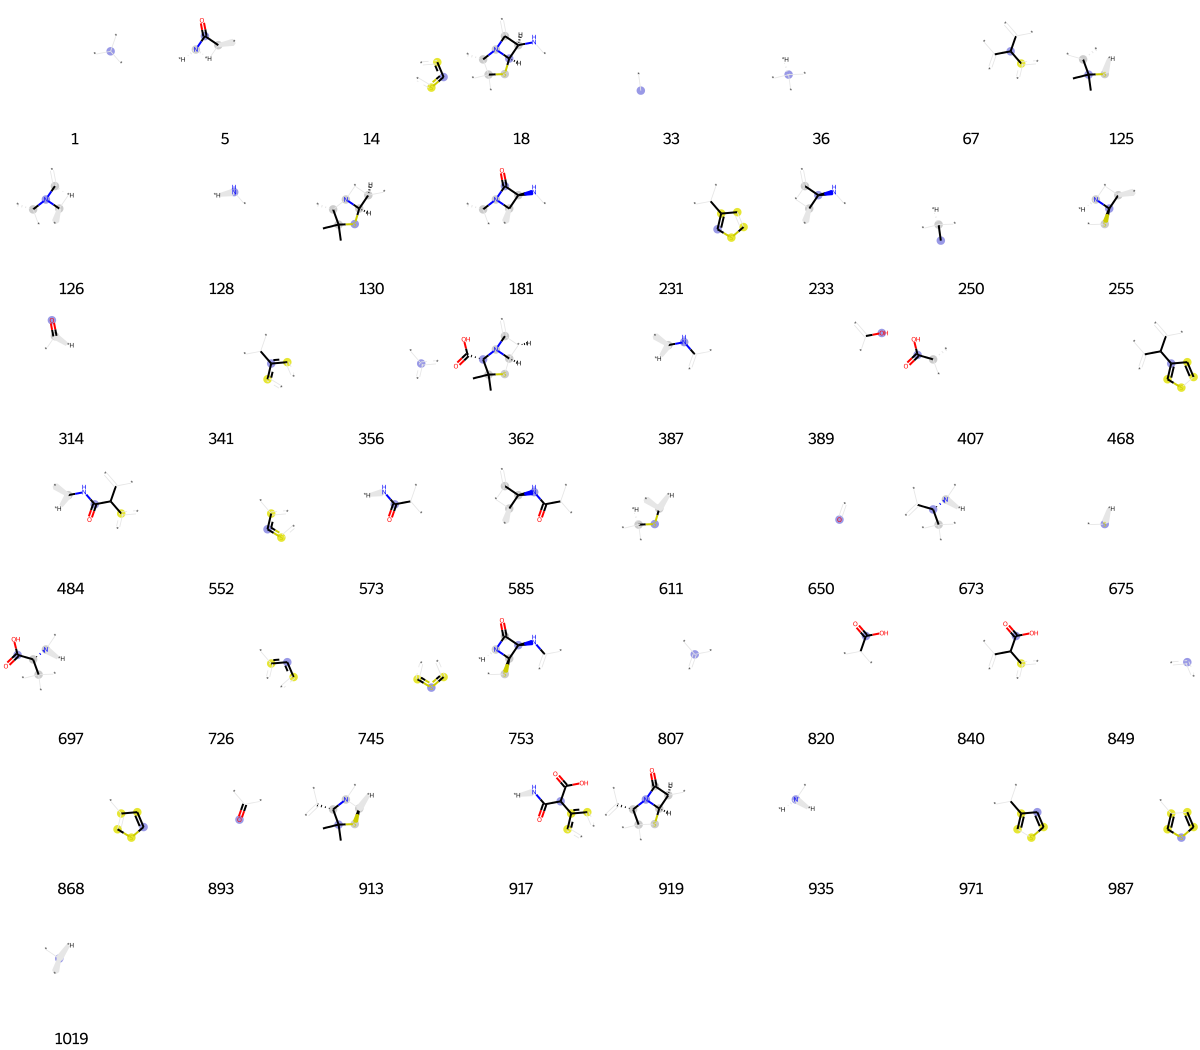

In [2955]:
prints = [(M28, x, bi) for x in fp28.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp28.GetOnBits ()])

In [2956]:
bi = {}

fp29= AllChem.GetMorganFingerprintAsBitVect(M29, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp29, fp_arr)
np.nonzero(fp_arr)
list(fp29.GetOnBits())

[33,
 128,
 157,
 165,
 225,
 245,
 283,
 301,
 314,
 356,
 387,
 421,
 552,
 613,
 650,
 675,
 707,
 762,
 789,
 807,
 893,
 926,
 976,
 1017,
 1019]

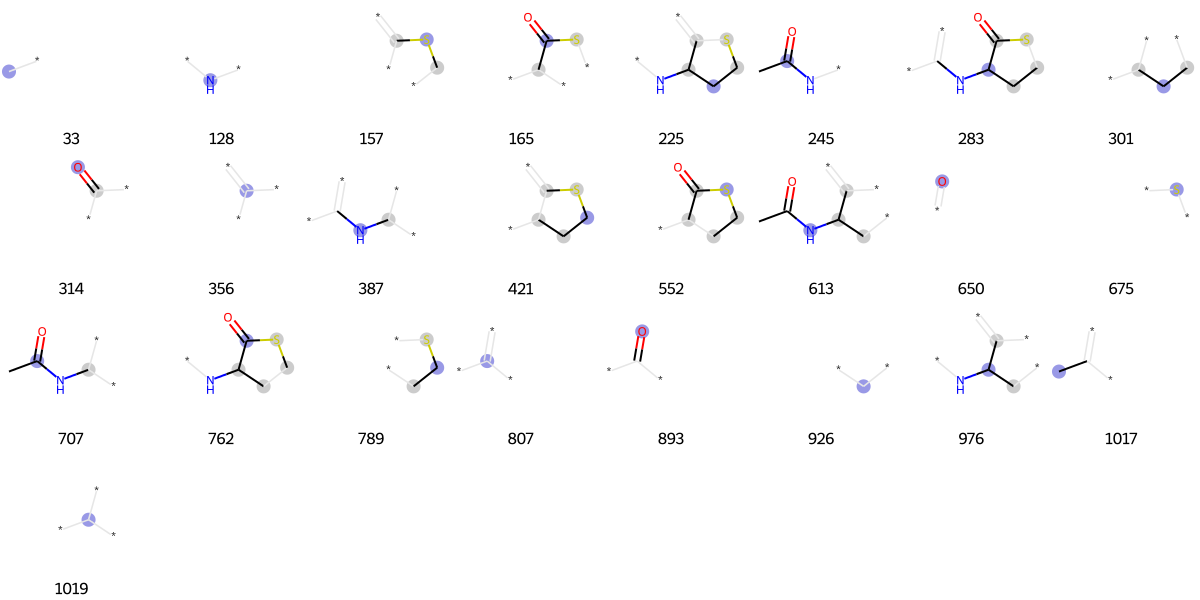

In [2957]:
prints = [(M29, x, bi) for x in fp29.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp29.GetOnBits ()])

In [2958]:
bi = {}

fp30= AllChem.GetMorganFingerprintAsBitVect(M30, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp30, fp_arr)
np.nonzero(fp_arr)
list(fp30.GetOnBits())

[1,
 33,
 64,
 66,
 72,
 73,
 90,
 106,
 122,
 128,
 131,
 160,
 175,
 203,
 237,
 283,
 296,
 323,
 343,
 356,
 378,
 379,
 386,
 428,
 448,
 463,
 489,
 506,
 563,
 588,
 600,
 603,
 646,
 690,
 699,
 706,
 708,
 713,
 726,
 786,
 794,
 806,
 827,
 831,
 834,
 839,
 842,
 849,
 875,
 904,
 959,
 961,
 965,
 980,
 984,
 988]

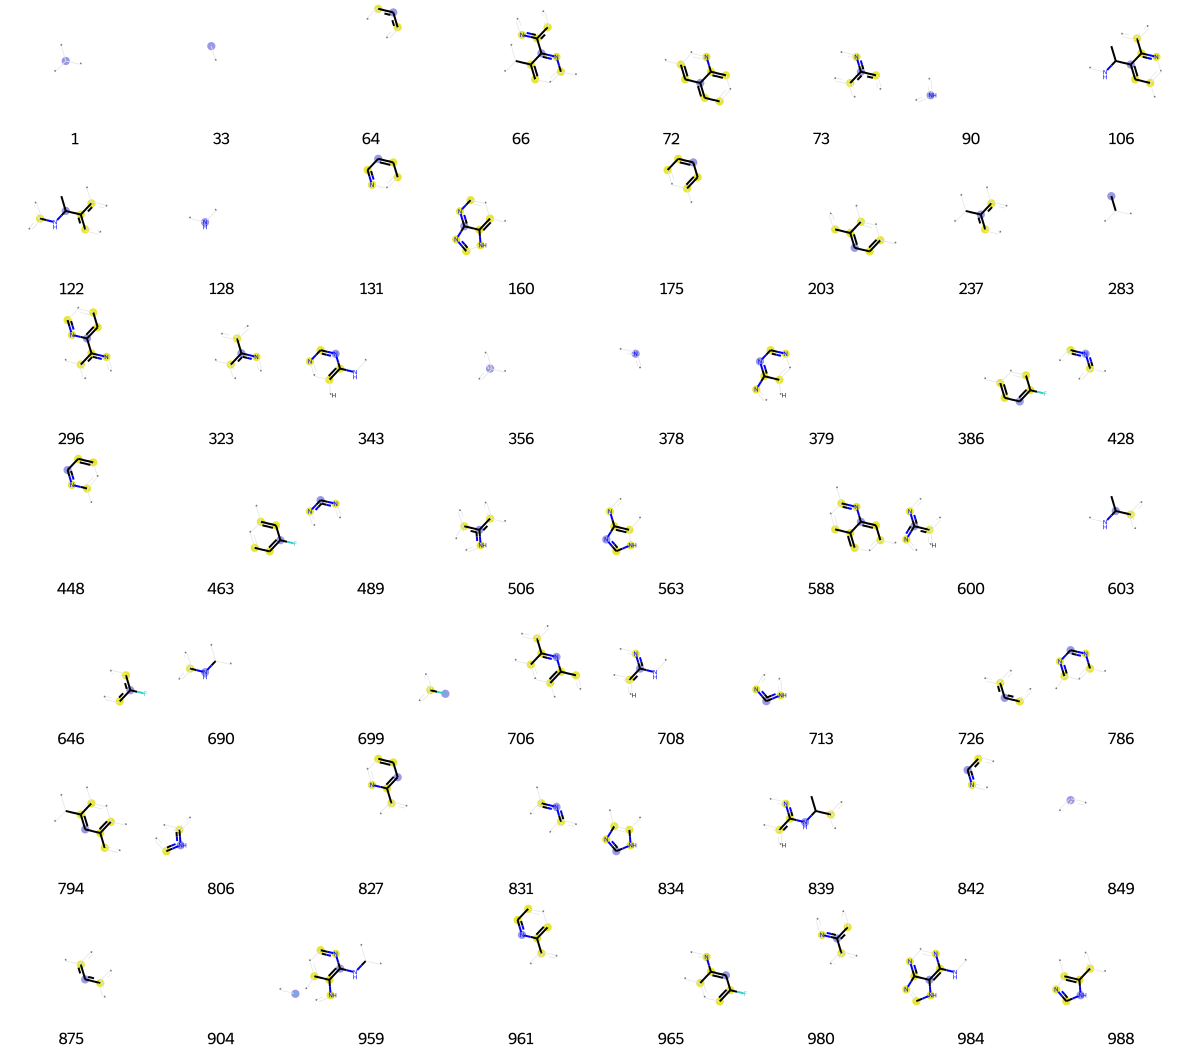

In [2959]:
prints = [(M30, x, bi) for x in fp30.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp30.GetOnBits ()])

In [2960]:
bi = {}

fp31= AllChem.GetMorganFingerprintAsBitVect(M31, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp31, fp_arr)
np.nonzero(fp_arr)
list(fp31.GetOnBits())

[15,
 33,
 36,
 42,
 50,
 64,
 73,
 87,
 105,
 128,
 165,
 178,
 184,
 216,
 249,
 268,
 271,
 272,
 333,
 344,
 356,
 372,
 378,
 386,
 389,
 399,
 406,
 422,
 428,
 477,
 482,
 486,
 495,
 512,
 528,
 552,
 561,
 613,
 650,
 659,
 668,
 673,
 695,
 709,
 723,
 726,
 735,
 787,
 807,
 816,
 828,
 841,
 842,
 849,
 855,
 875,
 893,
 898,
 921,
 926,
 932,
 933,
 935,
 946,
 952,
 1003,
 1019]

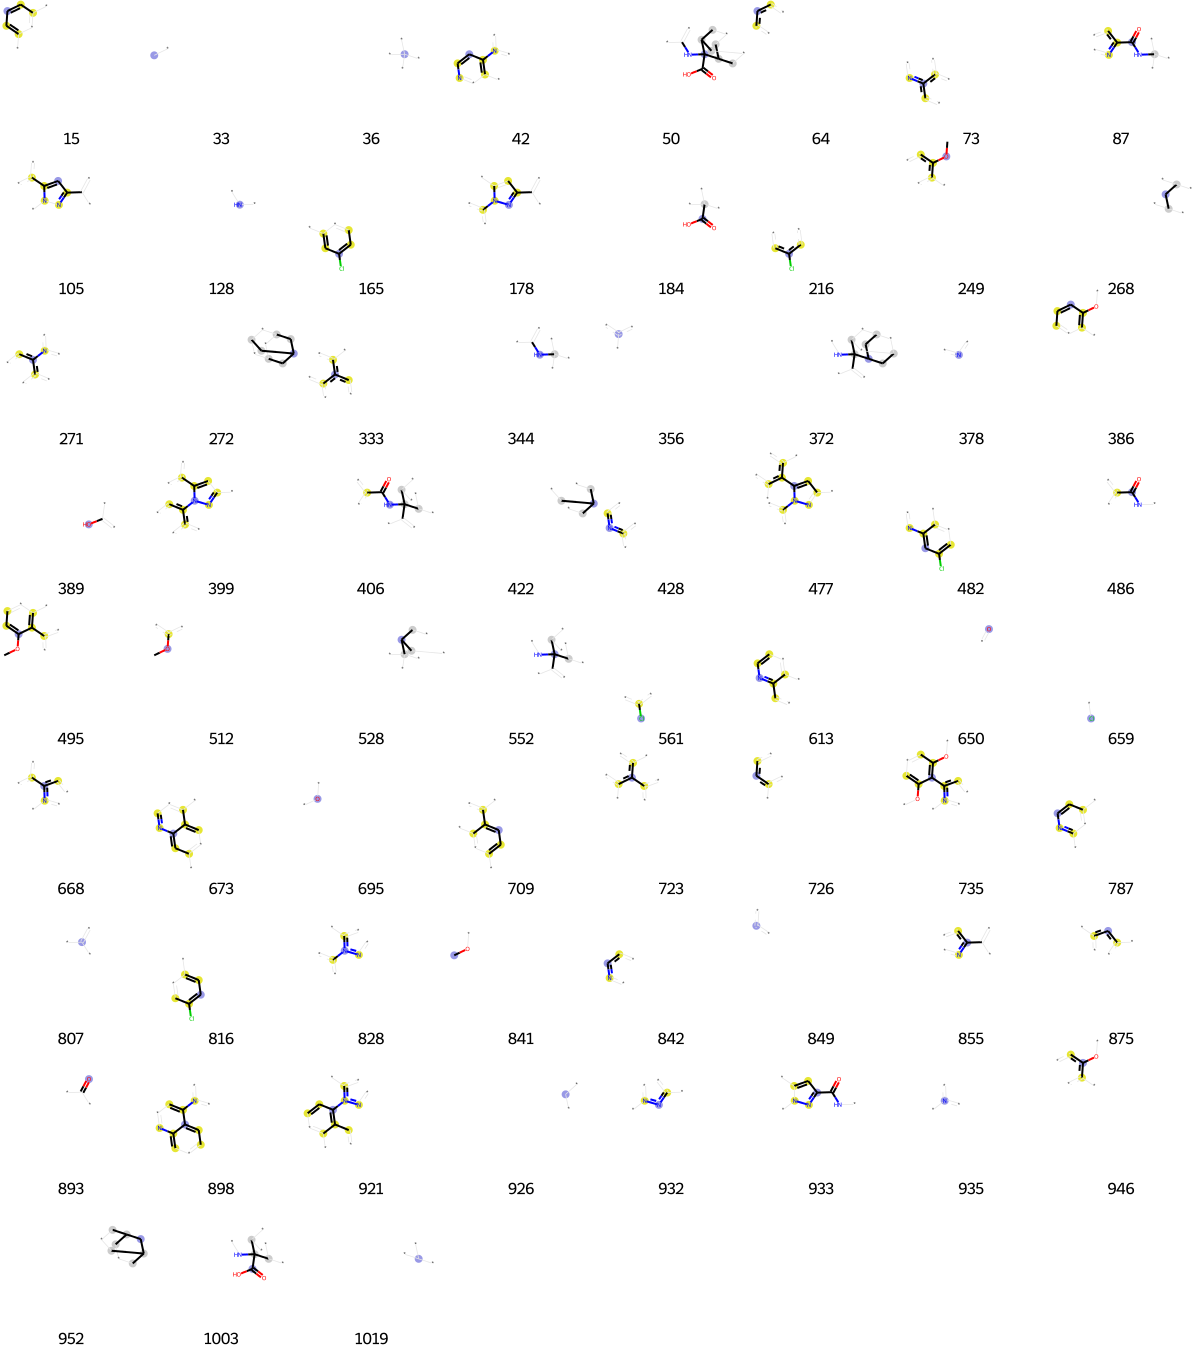

In [2961]:
prints = [(M31, x, bi) for x in fp31.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp31.GetOnBits ()])

In [2962]:
bi = {}

fp32= AllChem.GetMorganFingerprintAsBitVect(M32, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp32, fp_arr)
np.nonzero(fp_arr)
list(fp32.GetOnBits())

[3,
 14,
 15,
 47,
 64,
 74,
 75,
 80,
 128,
 172,
 307,
 312,
 315,
 324,
 350,
 356,
 362,
 365,
 366,
 378,
 385,
 421,
 423,
 428,
 456,
 480,
 491,
 501,
 543,
 554,
 561,
 565,
 647,
 650,
 659,
 675,
 699,
 724,
 726,
 741,
 767,
 784,
 807,
 831,
 842,
 849,
 893,
 904,
 905,
 926,
 935,
 942,
 956,
 957,
 967,
 974,
 985]

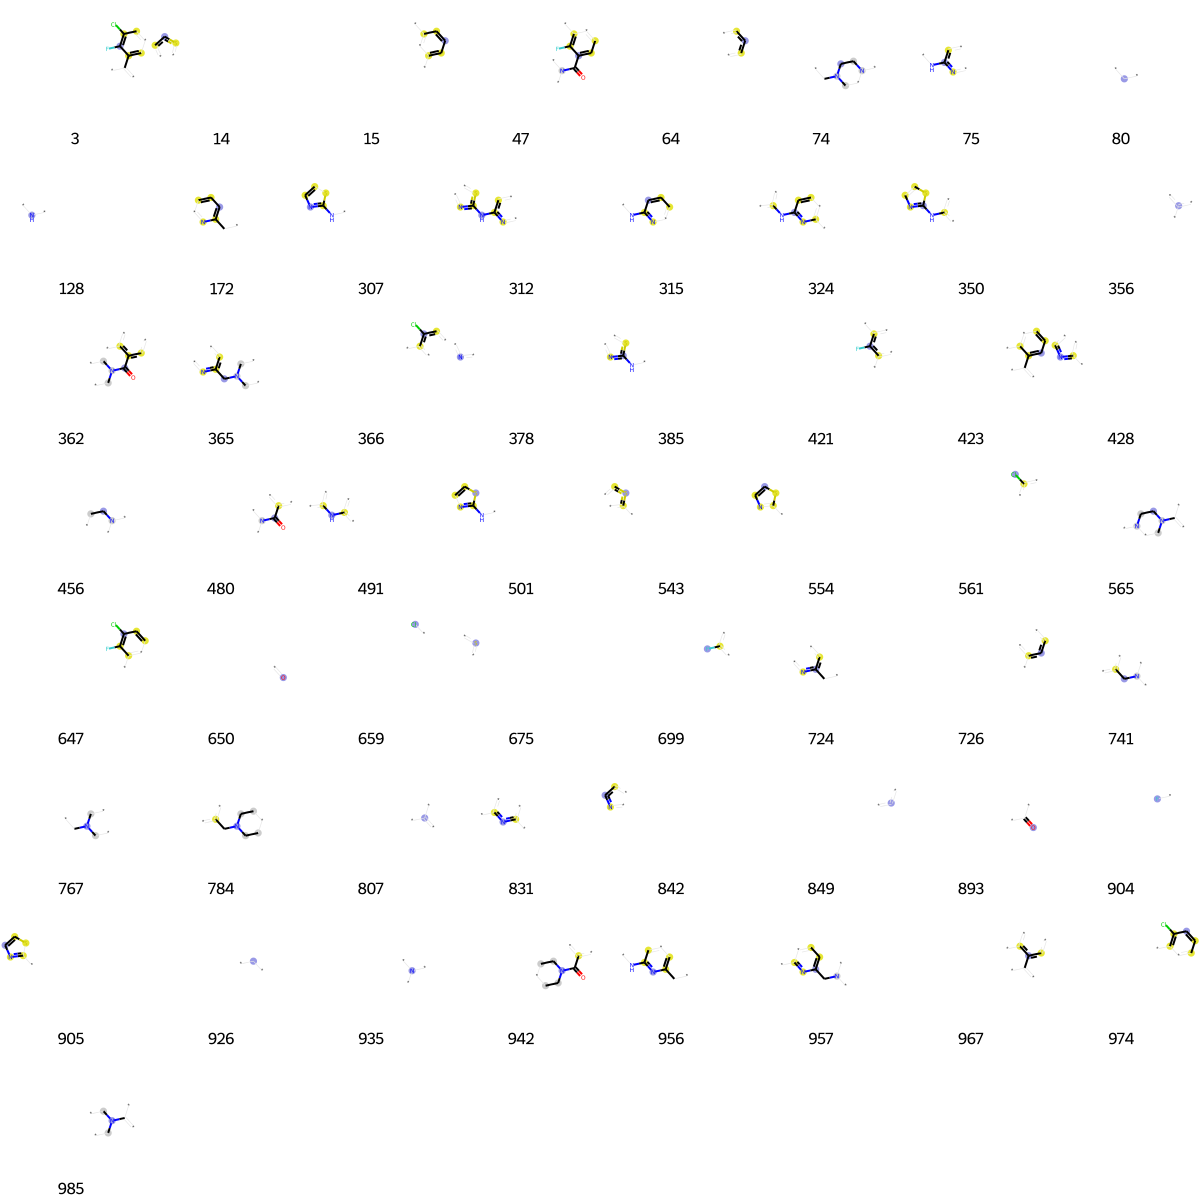

In [2963]:
prints = [(M32, x, bi) for x in fp32.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp32.GetOnBits ()])

In [2964]:
bi = {}

fp33= AllChem.GetMorganFingerprintAsBitVect(M33, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp33, fp_arr)
np.nonzero(fp_arr)
list(fp33.GetOnBits())

[29,
 64,
 136,
 175,
 292,
 356,
 378,
 389,
 428,
 489,
 637,
 661,
 712,
 716,
 726,
 736,
 786,
 849,
 875,
 947,
 980,
 1018]

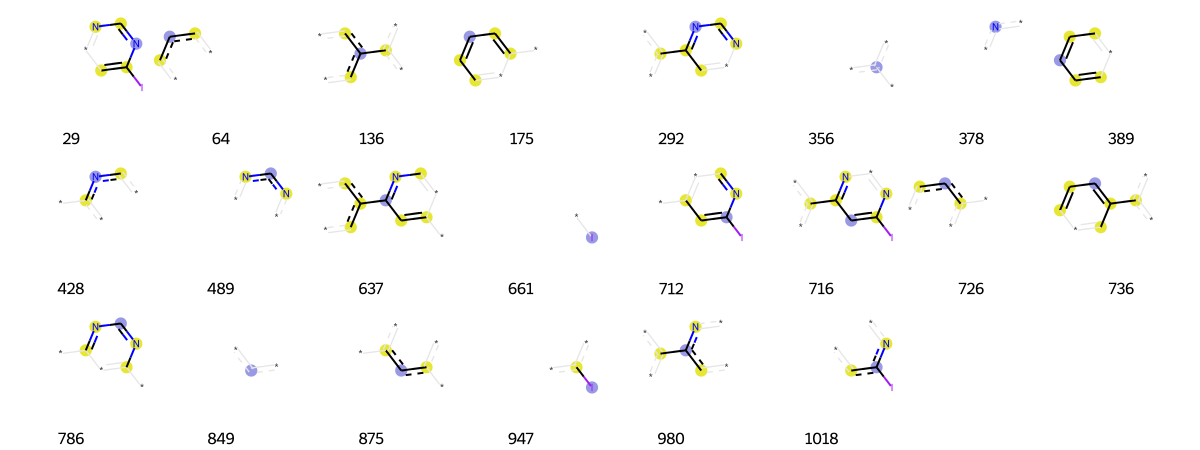

In [2965]:
prints = [(M33, x, bi) for x in fp33.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp33.GetOnBits ()])

In [2966]:
bi = {}

fp34= AllChem.GetMorganFingerprintAsBitVect(M34, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp34, fp_arr)
np.nonzero(fp_arr)
list(fp34.GetOnBits())

[4,
 33,
 34,
 45,
 55,
 61,
 63,
 64,
 80,
 82,
 104,
 121,
 175,
 232,
 244,
 260,
 261,
 294,
 297,
 301,
 305,
 314,
 316,
 356,
 378,
 407,
 412,
 428,
 446,
 456,
 460,
 580,
 589,
 630,
 650,
 656,
 670,
 680,
 726,
 739,
 771,
 784,
 787,
 802,
 814,
 831,
 842,
 849,
 850,
 853,
 875,
 886,
 888,
 902,
 926,
 935,
 969,
 980,
 983,
 1019]

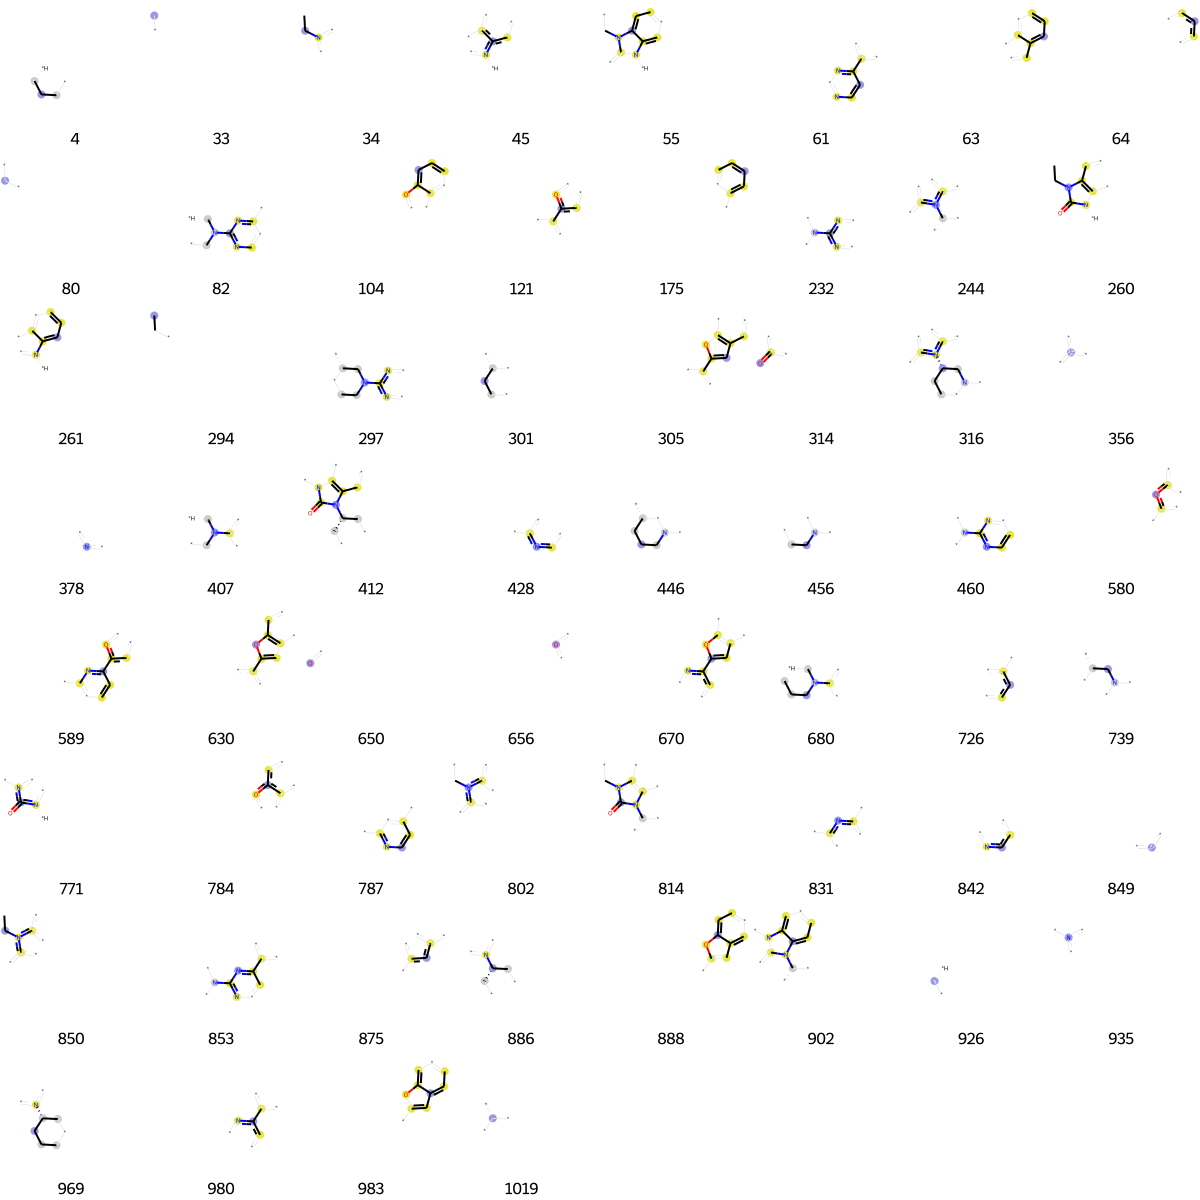

In [2967]:
prints = [(M34, x, bi) for x in fp34.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp34.GetOnBits ()])

In [2968]:
bi = {}

fp35= AllChem.GetMorganFingerprintAsBitVect(M35, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp35, fp_arr)
np.nonzero(fp_arr)
list(fp35.GetOnBits())

[15,
 33,
 41,
 42,
 64,
 80,
 104,
 119,
 128,
 160,
 170,
 192,
 197,
 219,
 222,
 294,
 322,
 356,
 420,
 428,
 473,
 477,
 559,
 562,
 591,
 597,
 650,
 667,
 695,
 723,
 726,
 730,
 794,
 807,
 849,
 863,
 875,
 887,
 893,
 978,
 980]

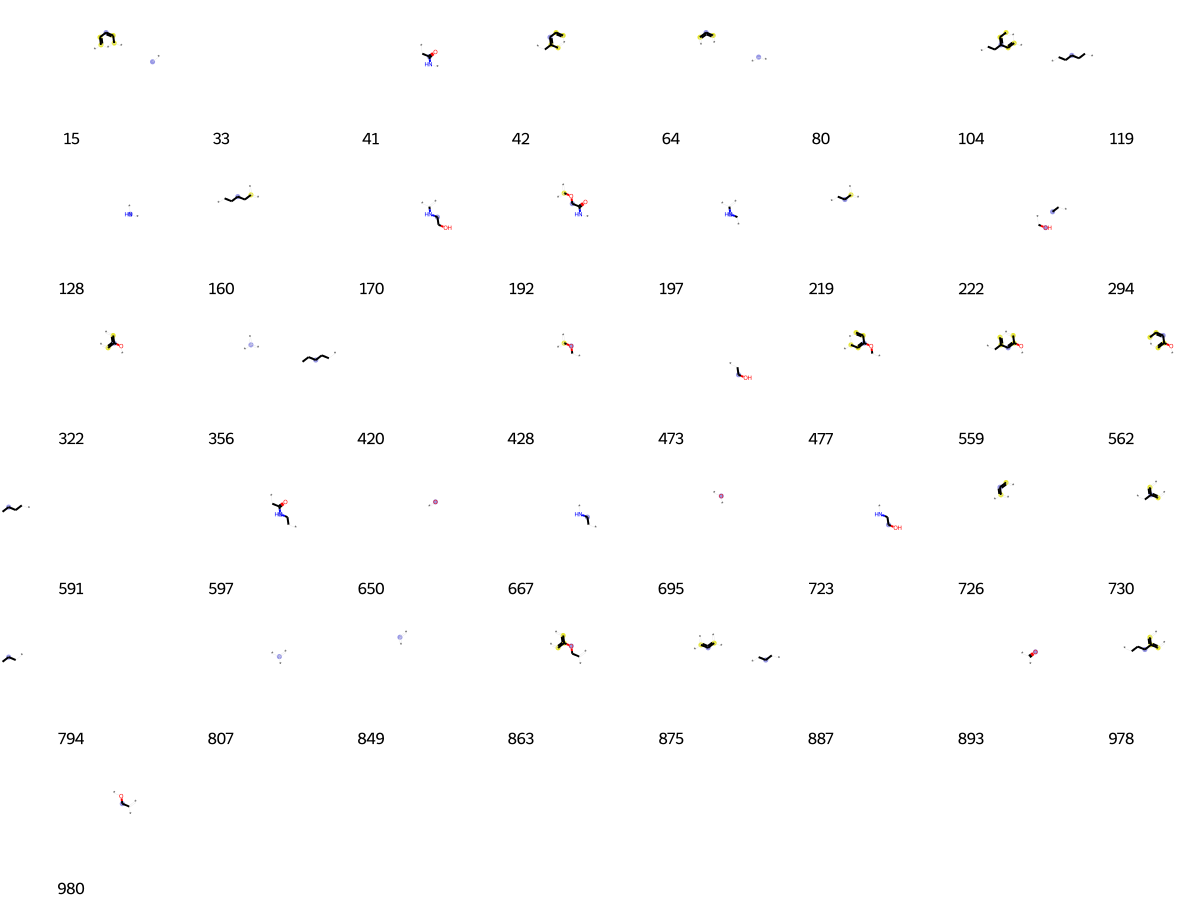

In [2969]:
prints = [(M35, x, bi) for x in fp35.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp35.GetOnBits ()])

In [2970]:
bi = {}

fp36= AllChem.GetMorganFingerprintAsBitVect(M36, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp36, fp_arr)
np.nonzero(fp_arr)
list(fp36.GetOnBits())

[33,
 106,
 232,
 250,
 268,
 322,
 356,
 361,
 390,
 512,
 659,
 673,
 695,
 718,
 726,
 781,
 804,
 807,
 831,
 841,
 849,
 970]

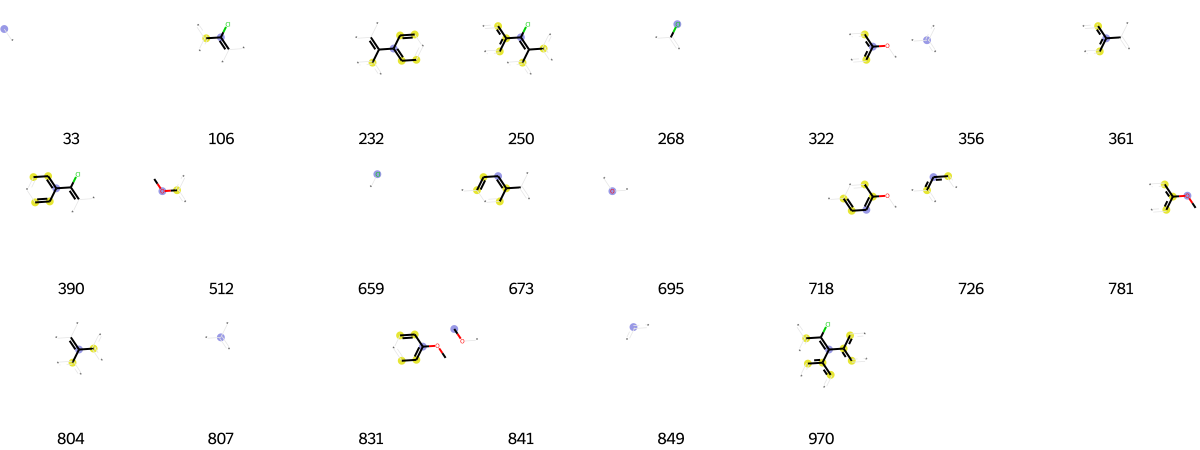

In [2971]:
prints = [(M36, x, bi) for x in fp36.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp36.GetOnBits ()])

In [2972]:
bi = {}

fp37= AllChem.GetMorganFingerprintAsBitVect(M37, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp37, fp_arr)
np.nonzero(fp_arr)
list(fp37.GetOnBits())

[64,
 90,
 172,
 175,
 207,
 314,
 352,
 356,
 404,
 469,
 537,
 565,
 633,
 650,
 726,
 762,
 840,
 849,
 857,
 893,
 924,
 984]

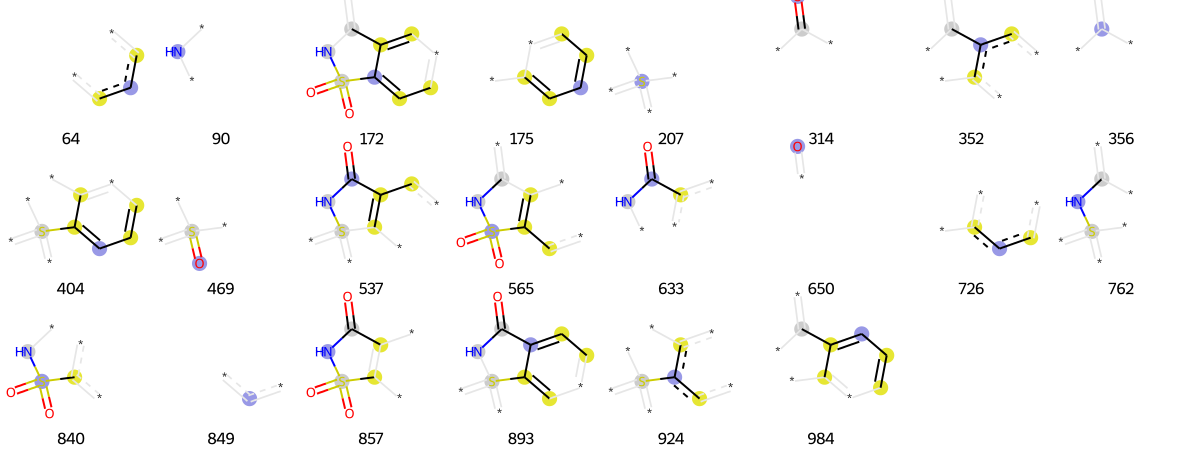

In [2973]:
prints = [(M37, x, bi) for x in fp37.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp37.GetOnBits ()])

In [2974]:
bi = {}

fp38= AllChem.GetMorganFingerprintAsBitVect(M38, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp38, fp_arr)
np.nonzero(fp_arr)
list(fp38.GetOnBits())

[14,
 19,
 33,
 69,
 121,
 207,
 212,
 233,
 314,
 356,
 366,
 378,
 379,
 407,
 456,
 484,
 525,
 530,
 553,
 556,
 558,
 561,
 650,
 659,
 662,
 666,
 726,
 731,
 801,
 849,
 875,
 879,
 899,
 926,
 935,
 955]

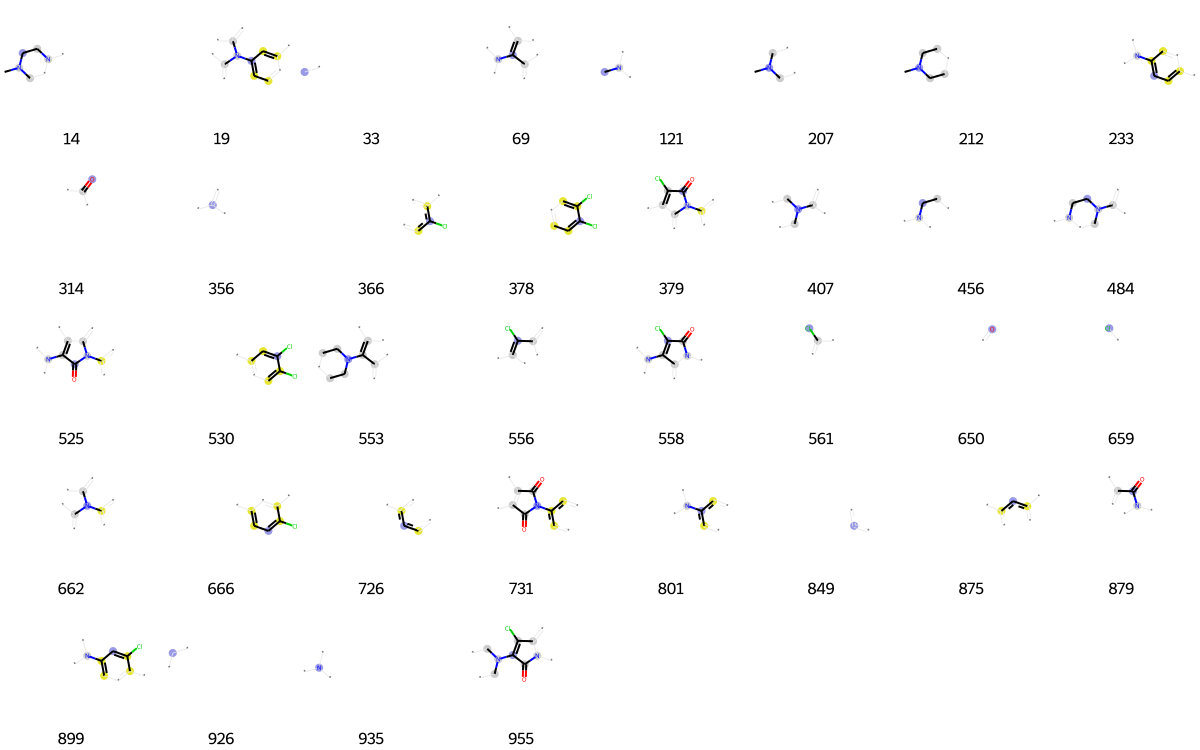

In [2975]:
prints = [(M38, x, bi) for x in fp38.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp38.GetOnBits ()])

In [2976]:
bi = {}

fp39= AllChem.GetMorganFingerprintAsBitVect(M39, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp39, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[7,
 72,
 102,
 112,
 128,
 186,
 200,
 237,
 242,
 305,
 356,
 360,
 389,
 446,
 561,
 650,
 659,
 674,
 790,
 792,
 807,
 849,
 851,
 875,
 893,
 945,
 964,
 1011]

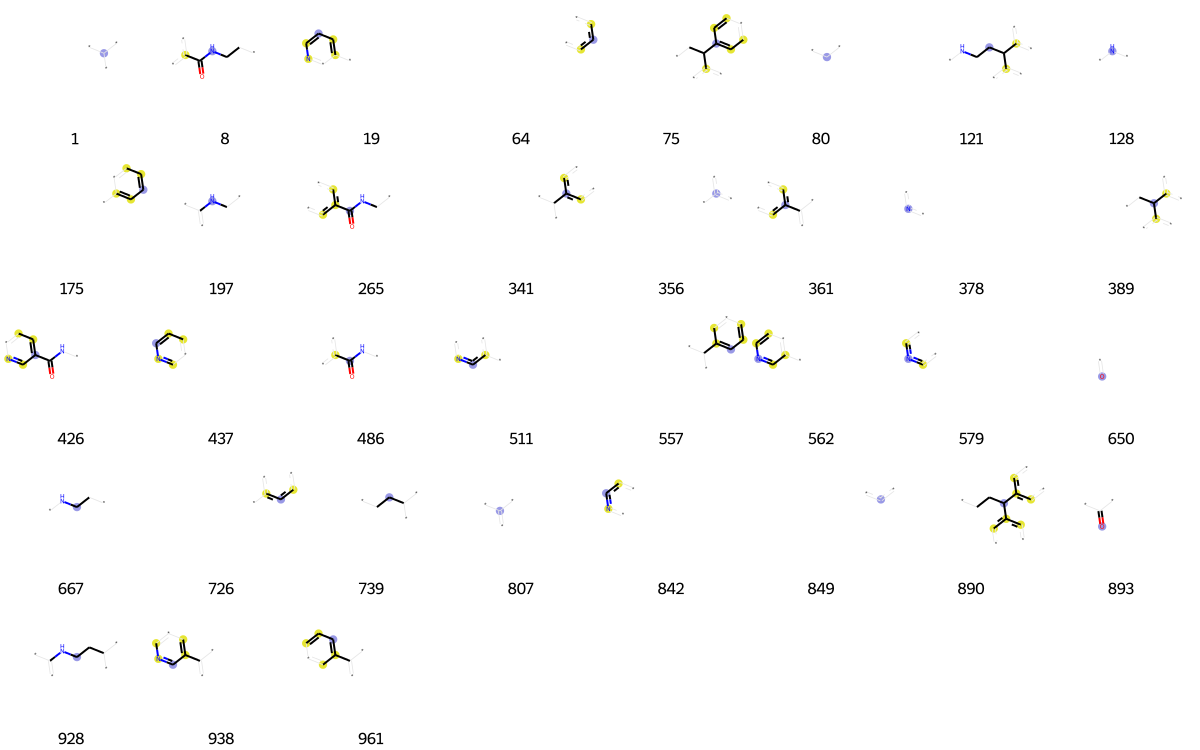

In [2977]:
prints = [(M39, x, bi) for x in fp39.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp39.GetOnBits ()])

In [2978]:
bi = {}

fp40= AllChem.GetMorganFingerprintAsBitVect(M40, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp40, fp_arr)
np.nonzero(fp_arr)
list(fp40.GetOnBits())

[23,
 63,
 64,
 80,
 175,
 202,
 240,
 333,
 356,
 389,
 406,
 456,
 549,
 578,
 612,
 650,
 726,
 807,
 831,
 836,
 846,
 849,
 875,
 893,
 944,
 953,
 954,
 967,
 1010]

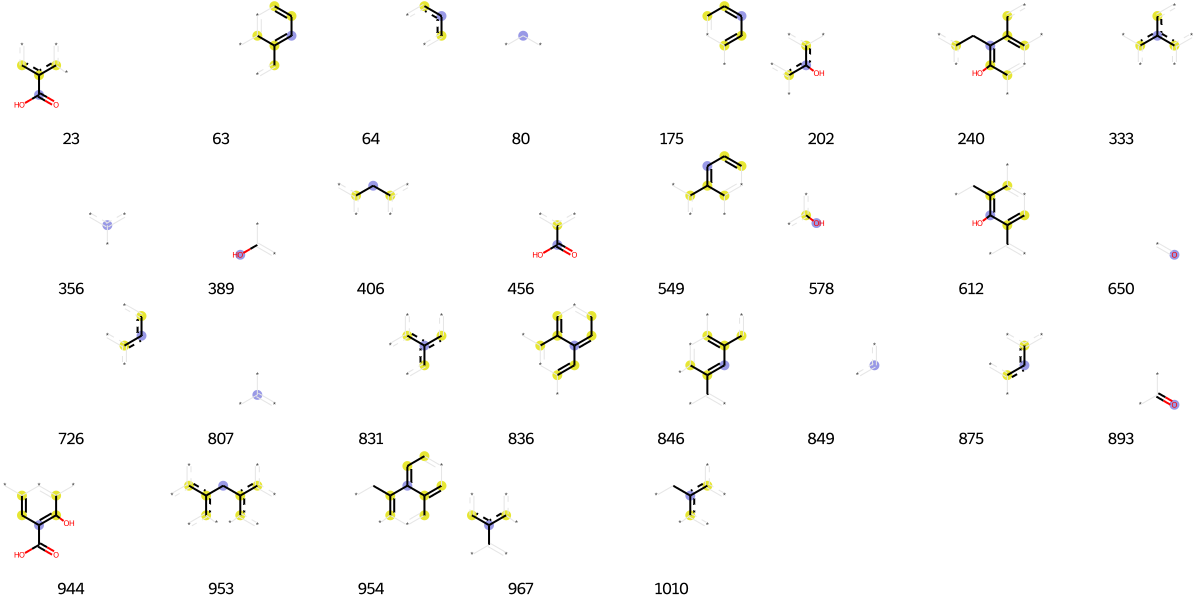

In [2979]:
prints = [(M40, x, bi) for x in fp40.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp40.GetOnBits ()])

In [2980]:
bi = {}

fp41= AllChem.GetMorganFingerprintAsBitVect(M41, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp41, fp_arr)
np.nonzero(fp_arr)
list(fp41.GetOnBits())

[4,
 25,
 56,
 64,
 73,
 147,
 175,
 233,
 275,
 280,
 289,
 301,
 333,
 337,
 356,
 378,
 389,
 433,
 473,
 527,
 549,
 624,
 712,
 714,
 726,
 807,
 831,
 849,
 910,
 924,
 926,
 938,
 1019]

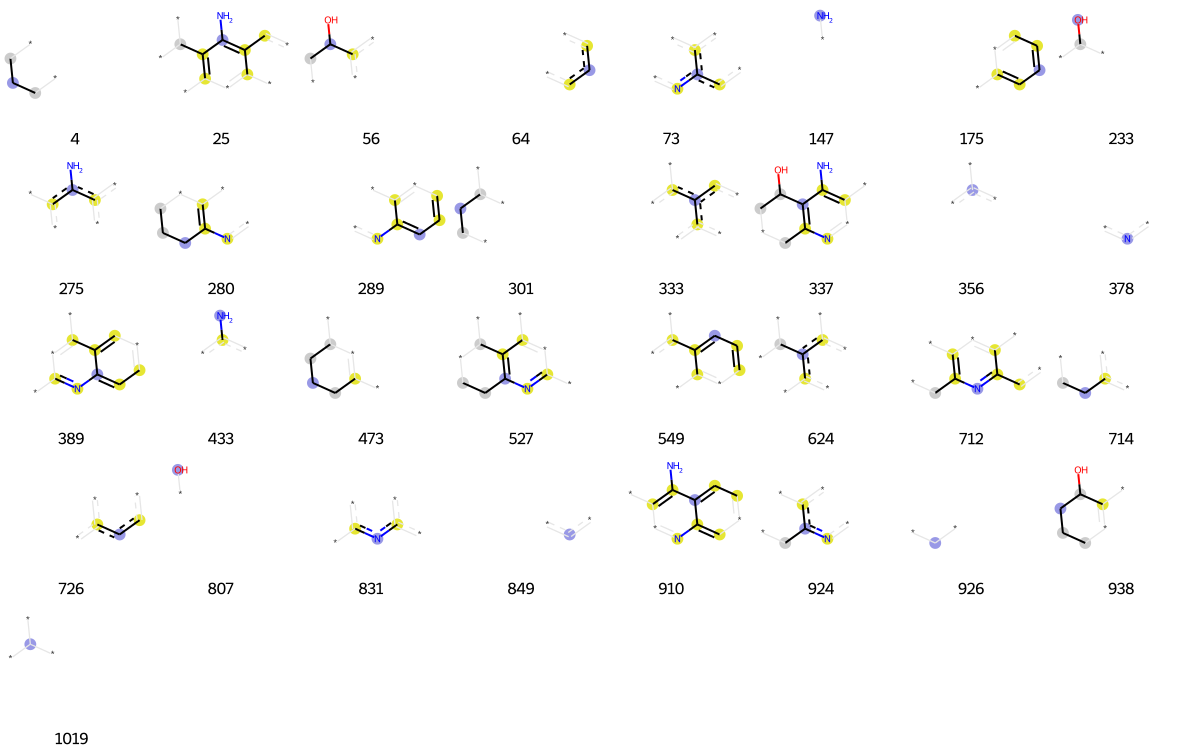

In [2981]:
prints = [(M41, x, bi) for x in fp41.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp41.GetOnBits ()])

In [2982]:
bi = {}

fp42= AllChem.GetMorganFingerprintAsBitVect(M42, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp42, fp_arr)
np.nonzero(fp_arr)
list(fp42.GetOnBits())

[63,
 64,
 80,
 121,
 136,
 175,
 203,
 314,
 333,
 356,
 389,
 532,
 549,
 580,
 630,
 650,
 656,
 666,
 726,
 736,
 772,
 779,
 784,
 786,
 831,
 849,
 865,
 875,
 920,
 960,
 992]

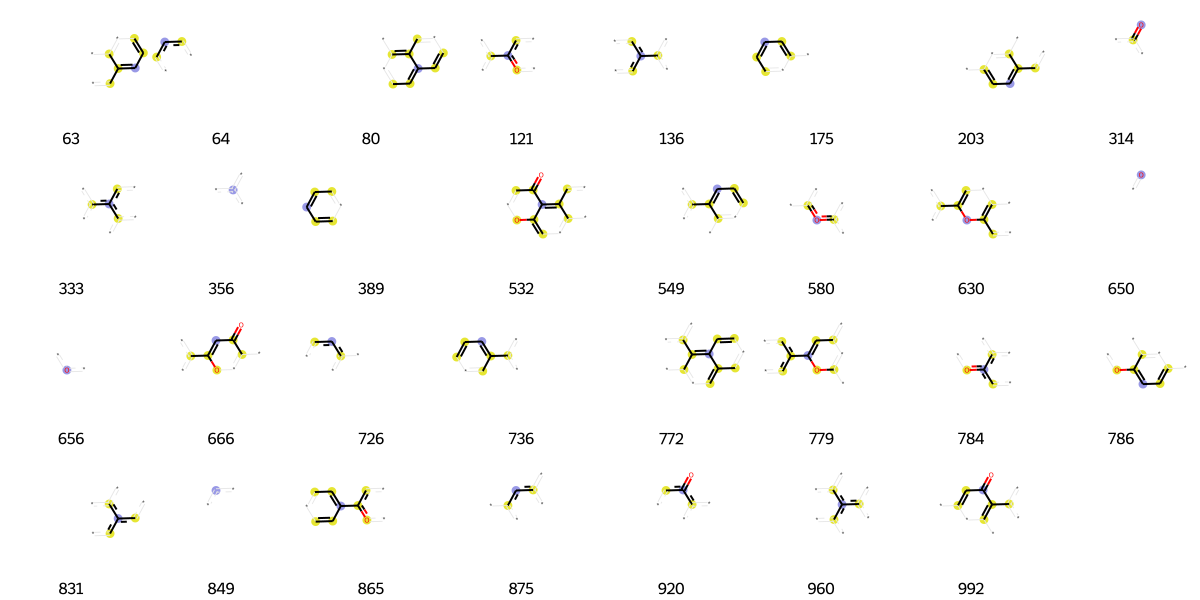

In [2983]:
prints = [(M42, x, bi) for x in fp42.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp42.GetOnBits ()])

In [2984]:
bi = {}

fp43= AllChem.GetMorganFingerprintAsBitVect(M43, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp43, fp_arr)
np.nonzero(fp_arr)
list(fp43.GetOnBits())

[33,
 36,
 50,
 80,
 84,
 87,
 88,
 130,
 138,
 157,
 182,
 195,
 203,
 222,
 242,
 250,
 262,
 283,
 287,
 301,
 314,
 356,
 370,
 408,
 412,
 479,
 504,
 507,
 519,
 529,
 580,
 588,
 622,
 640,
 650,
 671,
 714,
 738,
 807,
 841,
 849,
 860,
 893,
 926,
 940,
 948,
 973,
 995,
 1019]

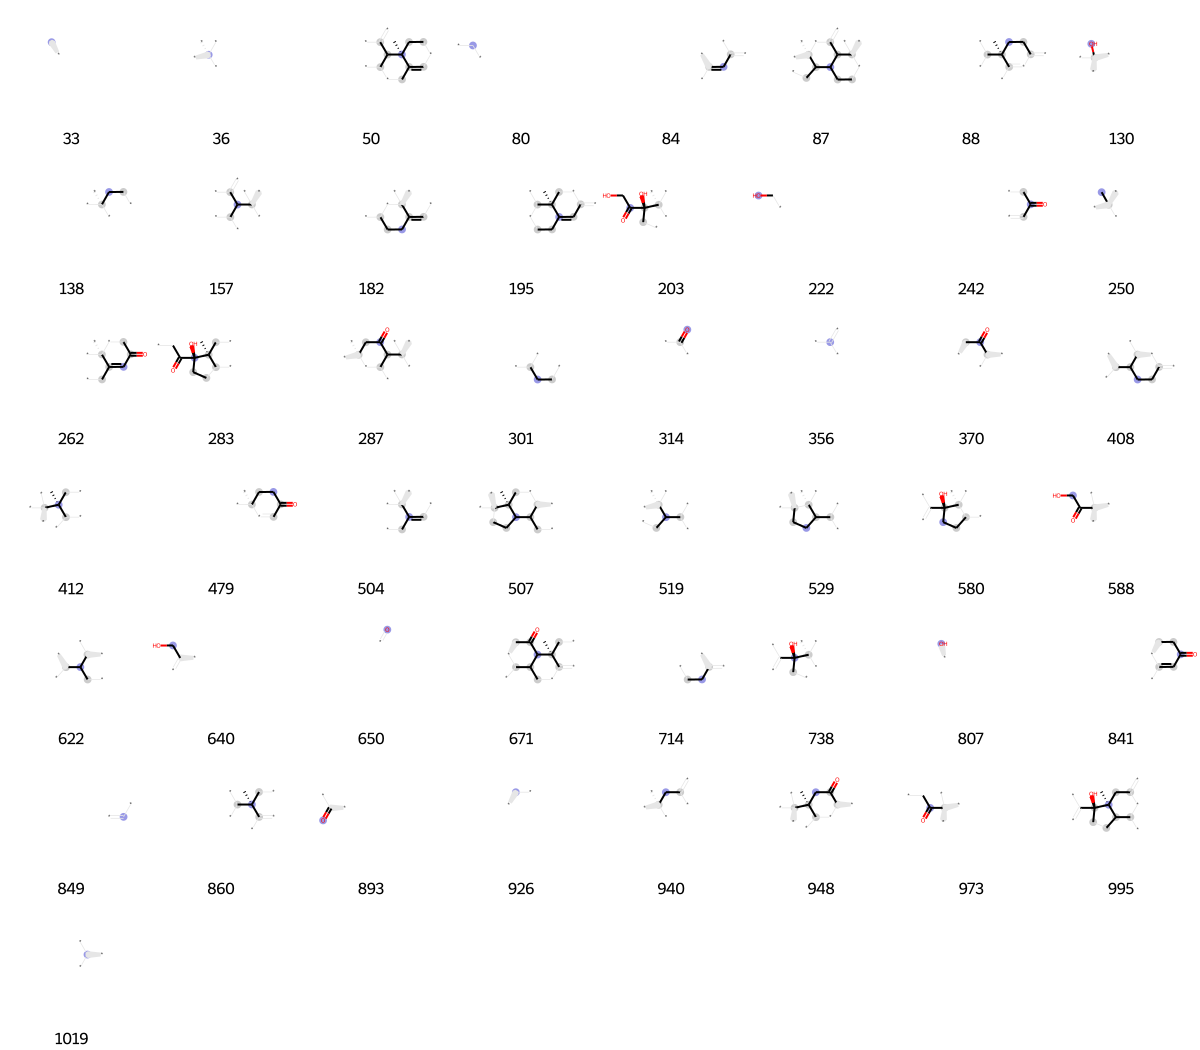

In [2985]:
prints = [(M43, x, bi) for x in fp43.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp43.GetOnBits ()])

In [2986]:
bi = {}

fp44= AllChem.GetMorganFingerprintAsBitVect(M44, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp44, fp_arr)
np.nonzero(fp_arr)
list(fp44.GetOnBits())

[13,
 36,
 54,
 80,
 104,
 136,
 157,
 167,
 171,
 210,
 222,
 233,
 299,
 314,
 315,
 333,
 356,
 424,
 443,
 451,
 463,
 472,
 473,
 489,
 492,
 501,
 524,
 525,
 578,
 580,
 583,
 589,
 610,
 650,
 656,
 695,
 696,
 726,
 740,
 745,
 784,
 807,
 820,
 849,
 875,
 896,
 897,
 953,
 960,
 964,
 1004,
 1019]

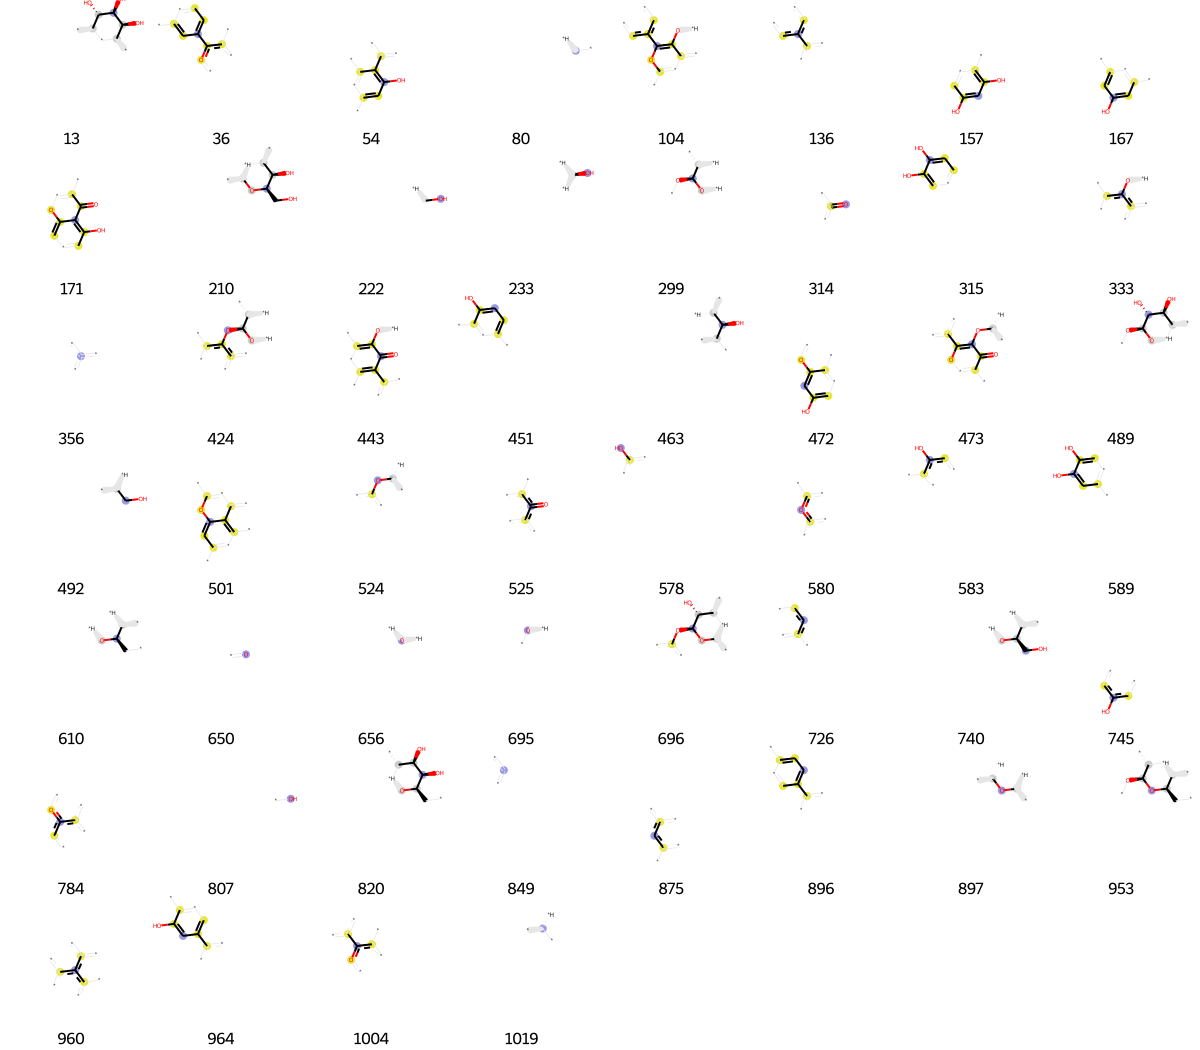

In [2987]:
prints = [(M44, x, bi) for x in fp44.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp44.GetOnBits ()])

In [2988]:
bi = {}

fp45= AllChem.GetMorganFingerprintAsBitVect(M45, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp45, fp_arr)
np.nonzero(fp_arr)
list(fp45.GetOnBits())

[4,
 80,
 90,
 114,
 164,
 211,
 222,
 233,
 240,
 262,
 268,
 314,
 356,
 377,
 419,
 429,
 439,
 445,
 464,
 492,
 577,
 601,
 605,
 610,
 650,
 656,
 721,
 740,
 750,
 758,
 795,
 807,
 809,
 849,
 860,
 896,
 897,
 904,
 926,
 935,
 1019]

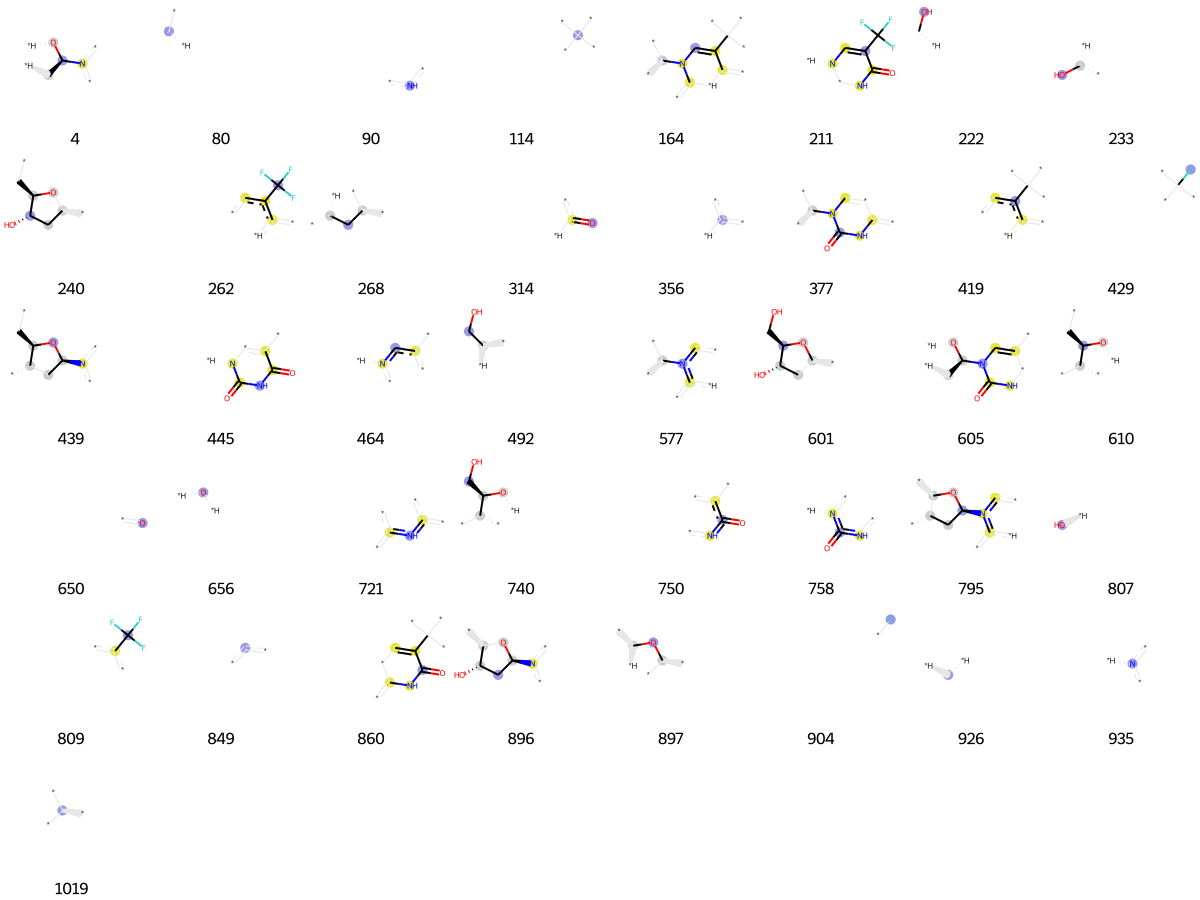

In [2989]:
prints = [(M45, x, bi) for x in fp45.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp45.GetOnBits ()])

In [2990]:
bi = {}

fp46= AllChem.GetMorganFingerprintAsBitVect(M46, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp46, fp_arr)
np.nonzero(fp_arr)
list(fp46.GetOnBits())

[1,
 2,
 4,
 15,
 25,
 36,
 64,
 74,
 80,
 114,
 118,
 138,
 227,
 236,
 250,
 293,
 316,
 356,
 393,
 407,
 429,
 441,
 456,
 465,
 484,
 496,
 498,
 597,
 603,
 614,
 615,
 674,
 687,
 695,
 726,
 767,
 801,
 807,
 809,
 818,
 849,
 875,
 898,
 904,
 909,
 915,
 926,
 935,
 974,
 978,
 993,
 1004,
 1014]

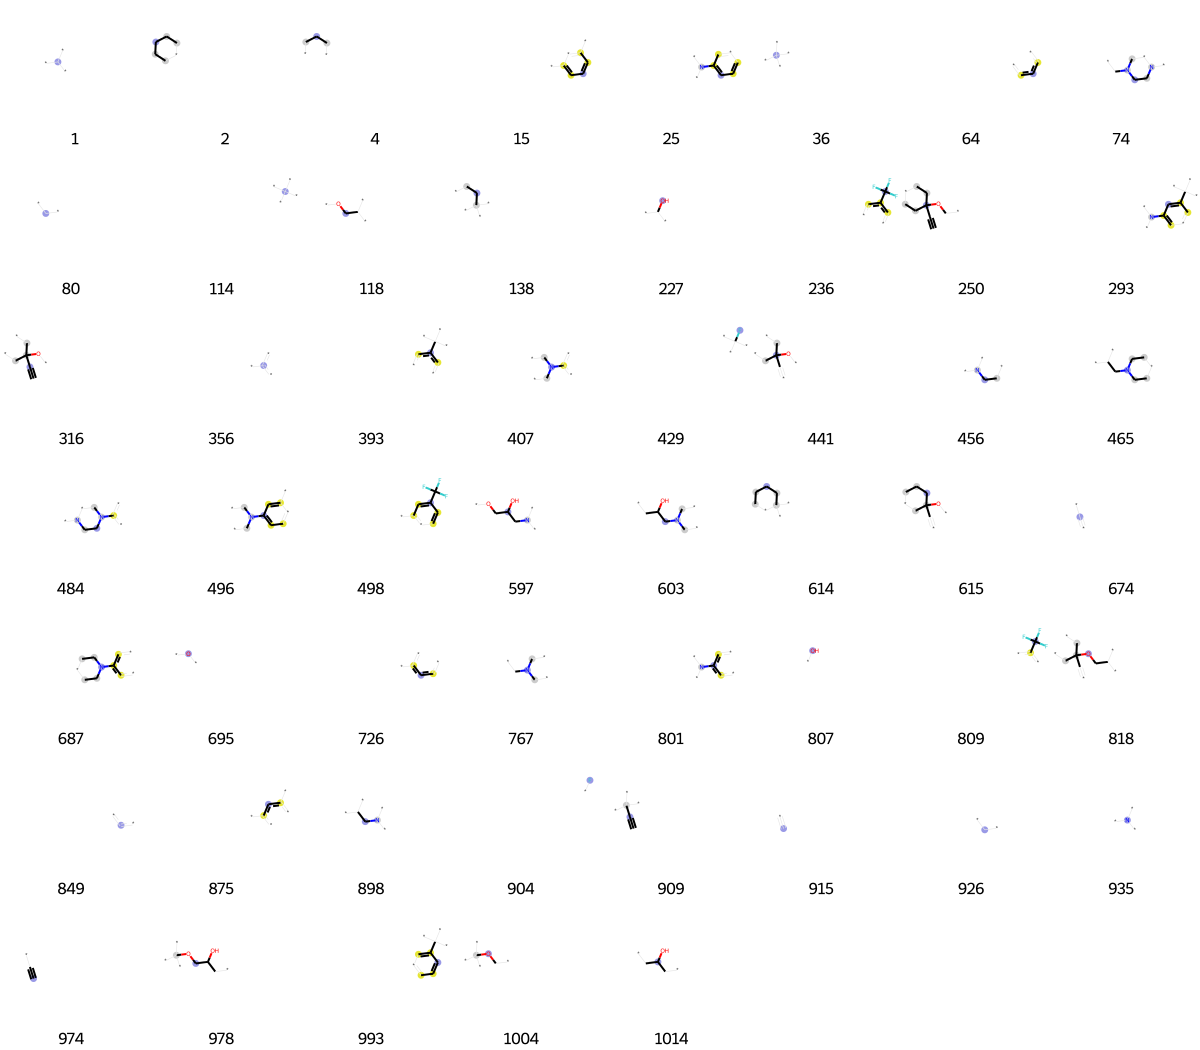

In [2991]:
prints = [(M46, x, bi) for x in fp46.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp46.GetOnBits ()])

In [2992]:
bi = {}

fp47= AllChem.GetMorganFingerprintAsBitVect(M47, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp47, fp_arr)
np.nonzero(fp_arr)
list(fp47.GetOnBits())

[1,
 33,
 35,
 46,
 90,
 95,
 106,
 129,
 187,
 210,
 216,
 244,
 255,
 283,
 305,
 314,
 322,
 352,
 356,
 366,
 378,
 385,
 456,
 462,
 504,
 512,
 551,
 555,
 561,
 603,
 617,
 635,
 650,
 659,
 664,
 666,
 680,
 695,
 718,
 726,
 766,
 779,
 781,
 795,
 807,
 816,
 841,
 842,
 849,
 875,
 877,
 893,
 903,
 922,
 926,
 935,
 946,
 948,
 954,
 956,
 985,
 1001,
 1014,
 1019]

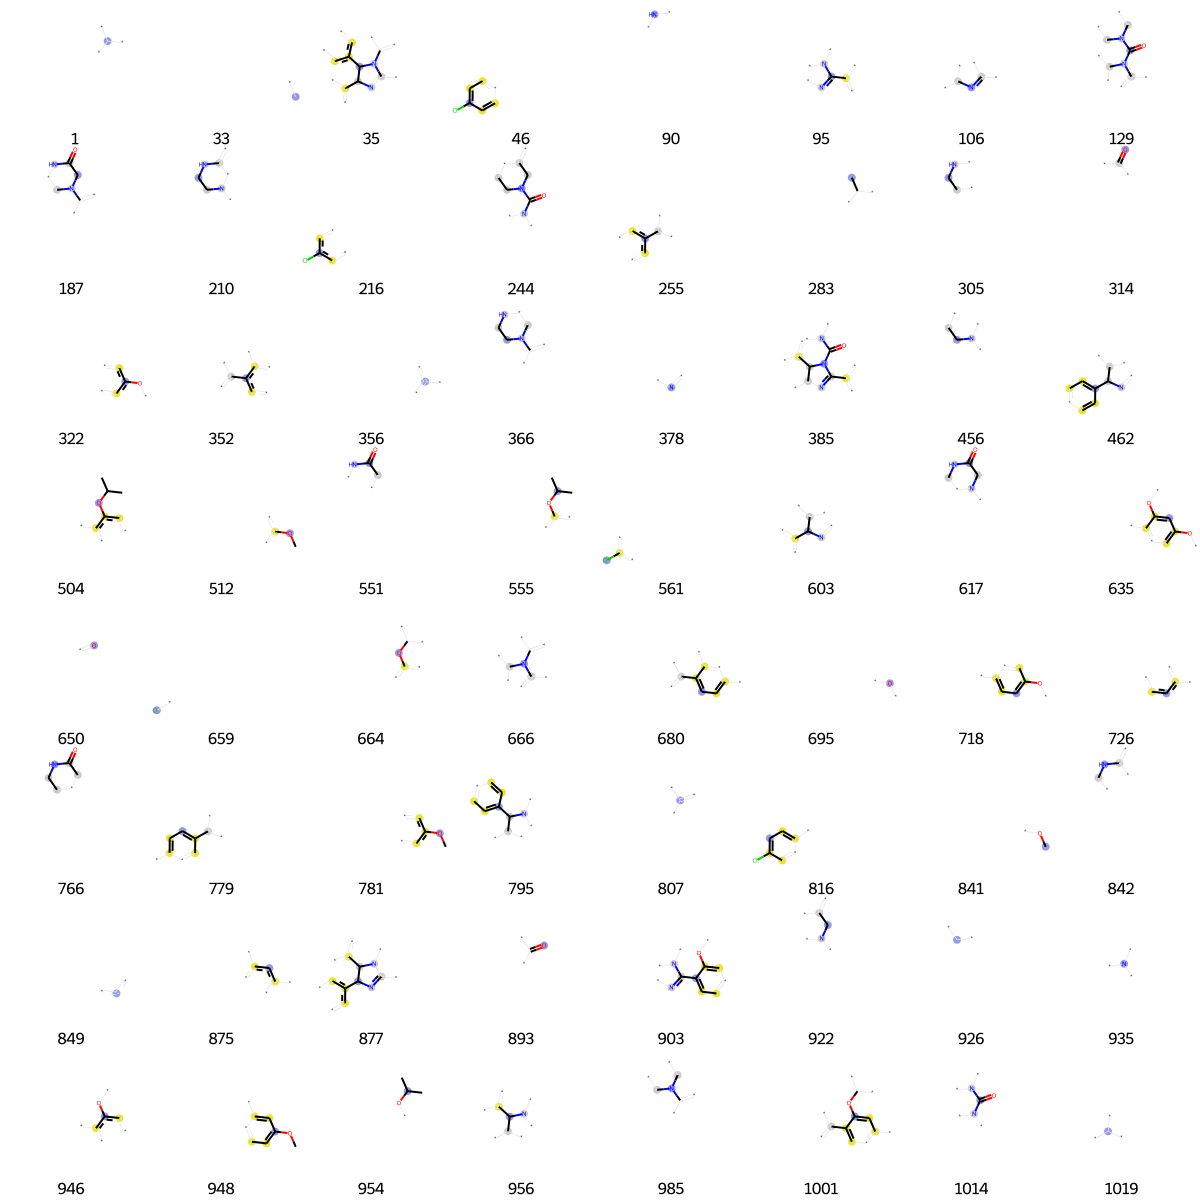

In [2993]:
prints = [(M47, x, bi) for x in fp47.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp47.GetOnBits ()])

In [2994]:
bi = {}

fp48= AllChem.GetMorganFingerprintAsBitVect(M48, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp48, fp_arr)
np.nonzero(fp_arr)
list(fp48.GetOnBits())

[1,
 3,
 11,
 33,
 80,
 86,
 133,
 145,
 147,
 214,
 217,
 259,
 294,
 297,
 345,
 356,
 360,
 368,
 433,
 456,
 477,
 607,
 650,
 656,
 674,
 677,
 695,
 698,
 726,
 728,
 731,
 759,
 766,
 786,
 790,
 794,
 807,
 849,
 875,
 879,
 881,
 893,
 907,
 909,
 952,
 998,
 1019]

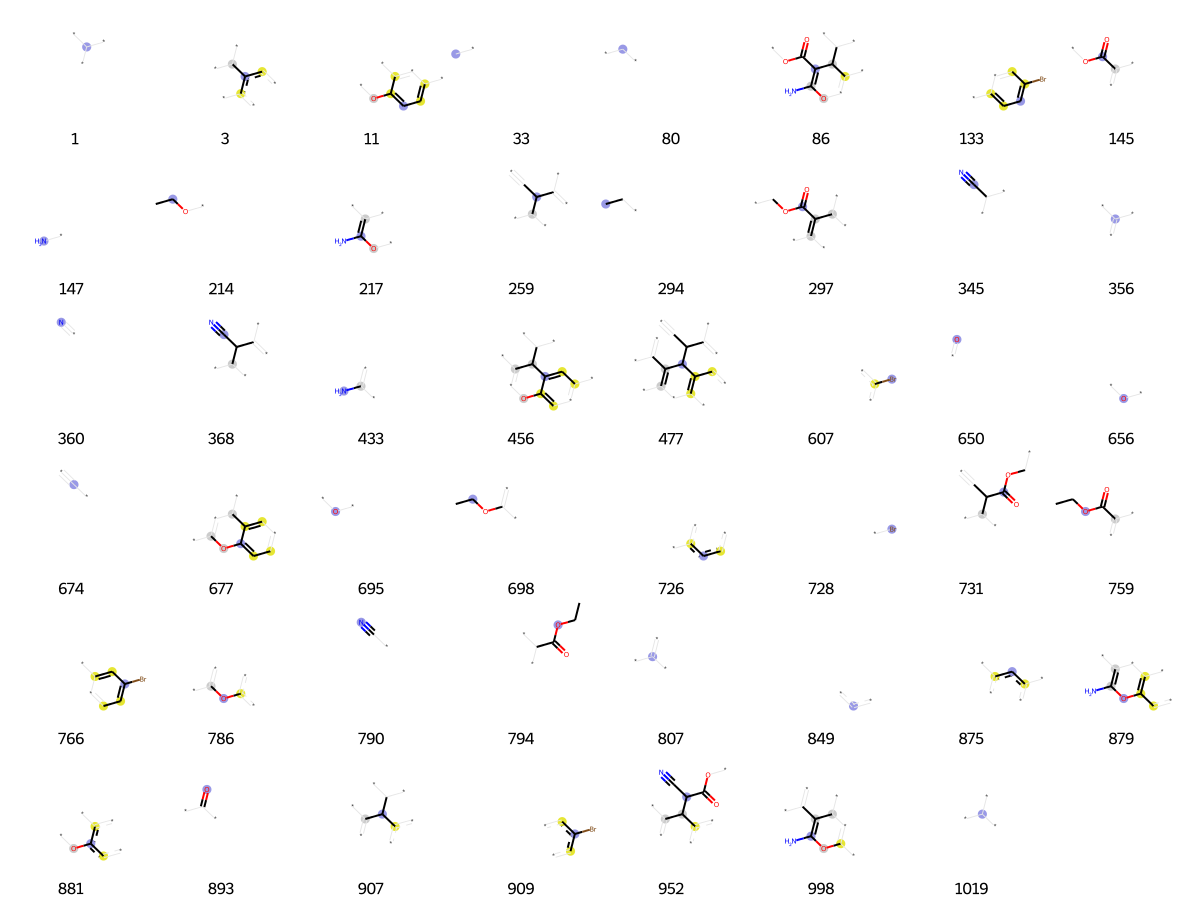

In [2995]:
prints = [(M48, x, bi) for x in fp48.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp48.GetOnBits ()])

In [2996]:
bi = {}

fp49= AllChem.GetMorganFingerprintAsBitVect(M49, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp49, fp_arr)
np.nonzero(fp_arr)
list(fp49.GetOnBits())

[14,
 25,
 33,
 36,
 64,
 90,
 95,
 102,
 103,
 121,
 162,
 175,
 207,
 212,
 229,
 352,
 356,
 378,
 407,
 440,
 446,
 452,
 456,
 482,
 484,
 588,
 608,
 675,
 698,
 721,
 726,
 754,
 849,
 875,
 880,
 926,
 927,
 935,
 944,
 958,
 1001,
 1012]

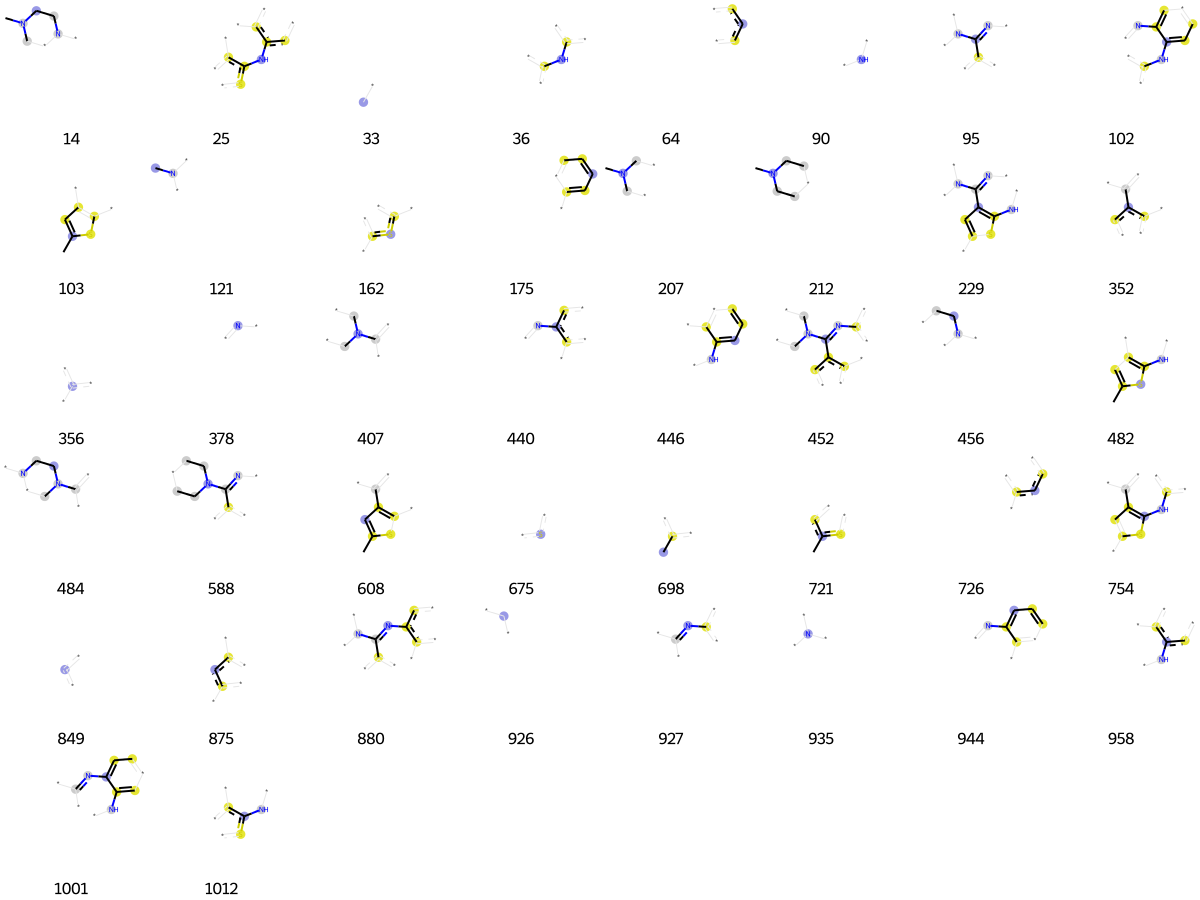

In [2997]:
prints = [(M49, x, bi) for x in fp49.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp49.GetOnBits ()])

In [2998]:
bi = {}

fp50= AllChem.GetMorganFingerprintAsBitVect(M50, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp50, fp_arr)
np.nonzero(fp_arr)
list(fp50.GetOnBits())

[1,
 4,
 15,
 33,
 46,
 63,
 64,
 80,
 128,
 175,
 190,
 216,
 225,
 237,
 283,
 301,
 333,
 356,
 361,
 379,
 387,
 486,
 528,
 546,
 549,
 561,
 581,
 603,
 641,
 650,
 659,
 673,
 726,
 790,
 807,
 816,
 831,
 840,
 849,
 890,
 893,
 926,
 985,
 1012,
 1019]

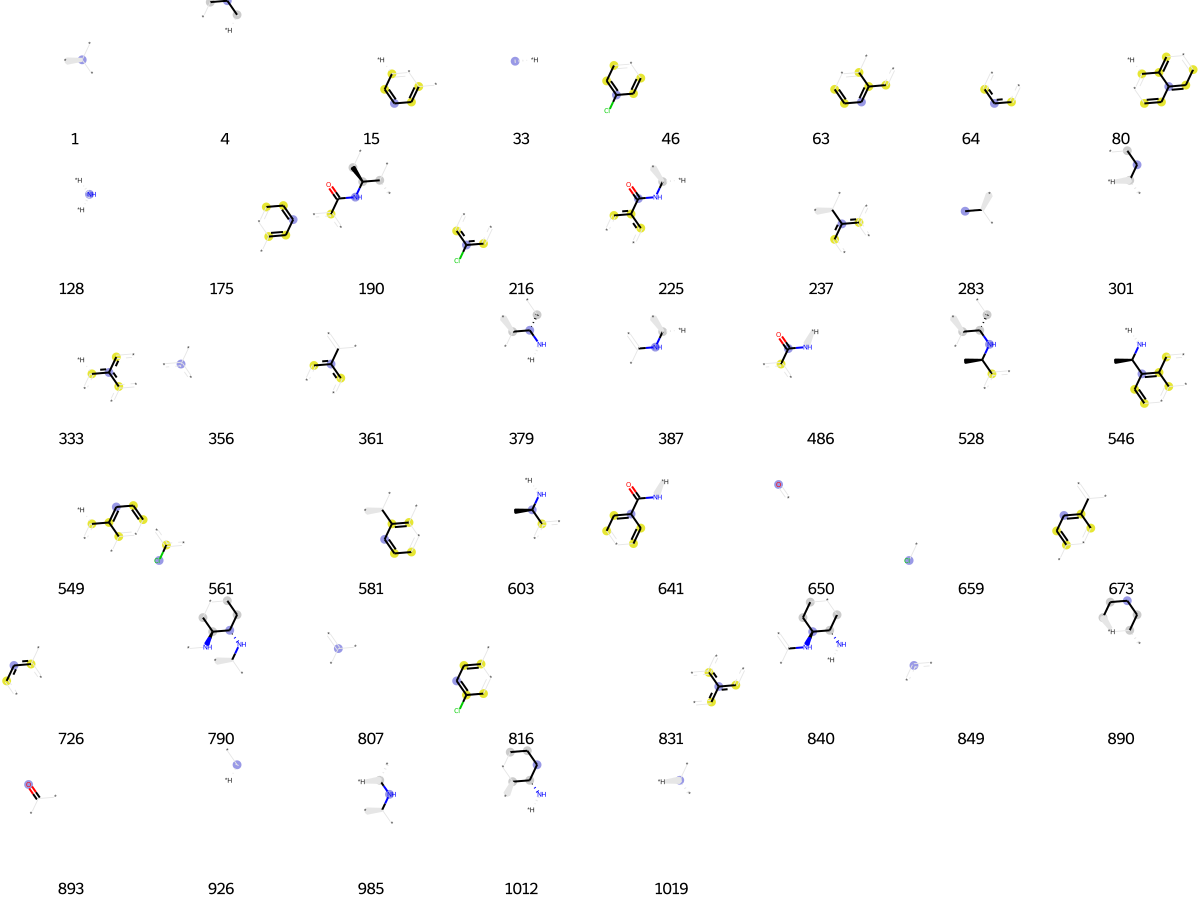

In [2999]:
prints = [(M50, x, bi) for x in fp50.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp50.GetOnBits ()])